In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lesson 7 (04/12/2024)

## Theory Lecture

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32        1  
3       0.167   21        0  
4       2.288   33        1  
..        ...  ...      ...  
763     0.171   63        0  
764     0.340   27        0  
765     0.245   30        0  
766     0.349   47        1  
767     0.315   23        0  

[768 rows x 9 columns]

Target variable is `Outcome`

In [4]:
diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
diabetes.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

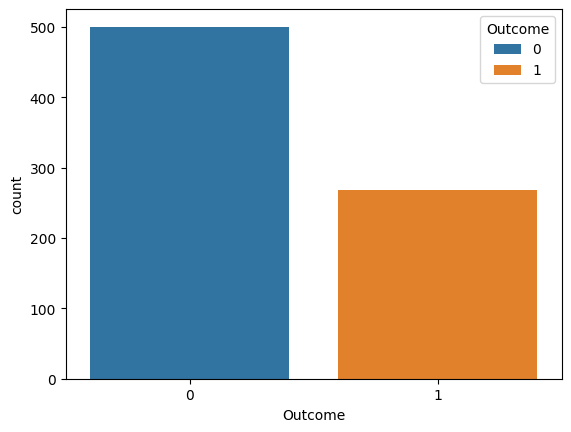

In [6]:
sns.countplot(x="Outcome", data=diabetes, hue="Outcome")

In [154]:
X = diabetes.drop('Outcome', axis=1) # Features (independent variables)
y = diabetes.Outcome # Target (dependent variable)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
y_train.value_counts(normalize=True)

Outcome
0    0.654514
1    0.345486
Name: proportion, dtype: float64

**Gini criterion**

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
# The Gini impurity criterion measures how often a randomly chosen element from the dataset would be incorrectly classified
giniDecisionTree = DecisionTreeClassifier(criterion='gini')
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
giniPred = giniDecisionTree.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, giniPred))

[[85 38]
 [24 45]]


In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, giniPred))

Accuracy Score:  0.6770833333333334


[Text(0.547096108490566, 0.9642857142857143, 'Glucose <= 143.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.24513561320754718, 0.8928571428571429, 'Age <= 28.5\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.3961158608490566, 0.9285714285714286, 'True  '),
 Text(0.1320754716981132, 0.8214285714285714, 'Glucose <= 127.5\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.07547169811320754, 0.75, 'BMI <= 49.1\ngini = 0.134\nsamples = 208\nvalue = [193.0, 15.0]'),
 Text(0.0660377358490566, 0.6785714285714286, 'BMI <= 31.4\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.018867924528301886, 0.6071428571428571, 'Pedigree <= 0.672\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.009433962264150943, 0.5357142857142857, 'gini = 0.0\nsamples = 103\nvalue = [103, 0]'),
 Text(0.02830188679245283, 0.5357142857142857, 'Pedigree <= 0.697\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.018867924528301886, 0.4642857142857143, 'gini = 0.0\nsam

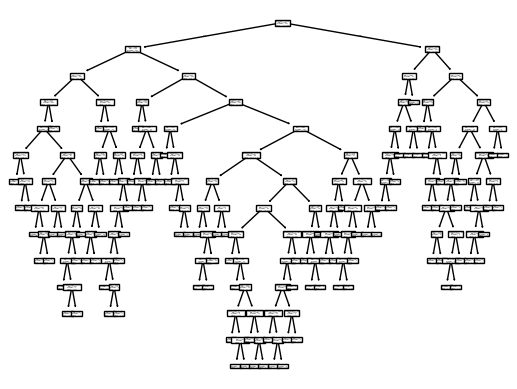

In [16]:
from sklearn import tree
features=diabetes.columns
tree.plot_tree(giniDecisionTree, feature_names=features)

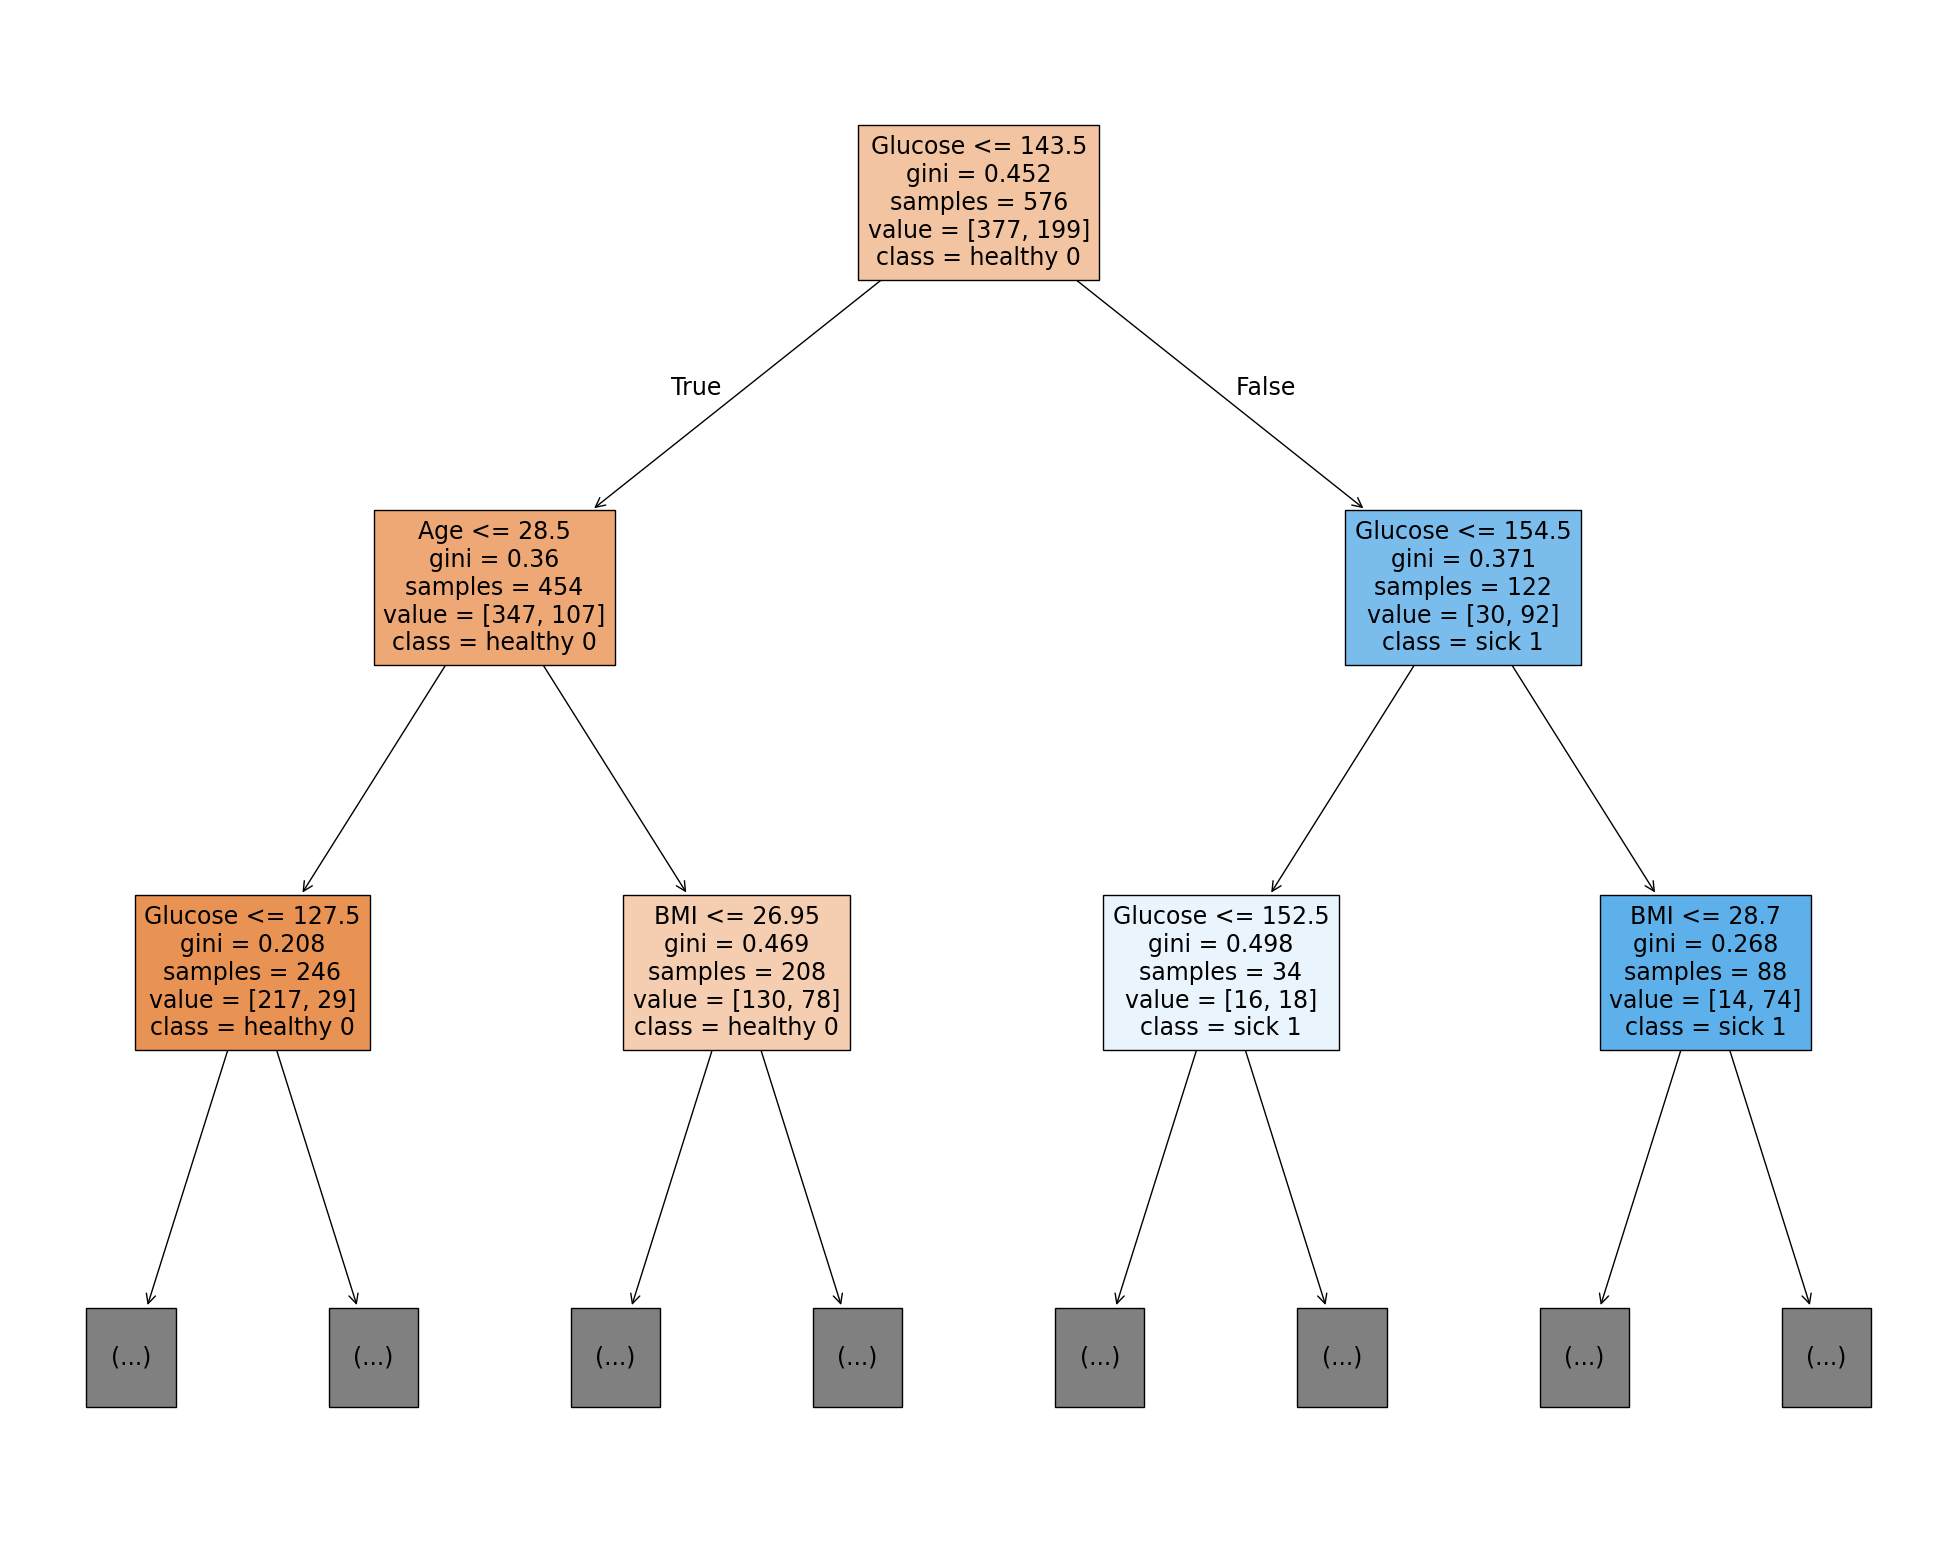

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(giniDecisionTree,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   max_depth=2,
                   filled=True)

**Entropy criterion**

In [18]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')
entropyDecisionTree.fit(X_train, y_train)
entropyPred = entropyDecisionTree.predict(X_test)

In [19]:
entropyDecisionTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [20]:
confusion_matrix(y_test, entropyPred)

array([[93, 30],
       [26, 43]])

In [21]:
print('Accuracy Score: ', accuracy_score(y_test, entropyPred))

Accuracy Score:  0.7083333333333334


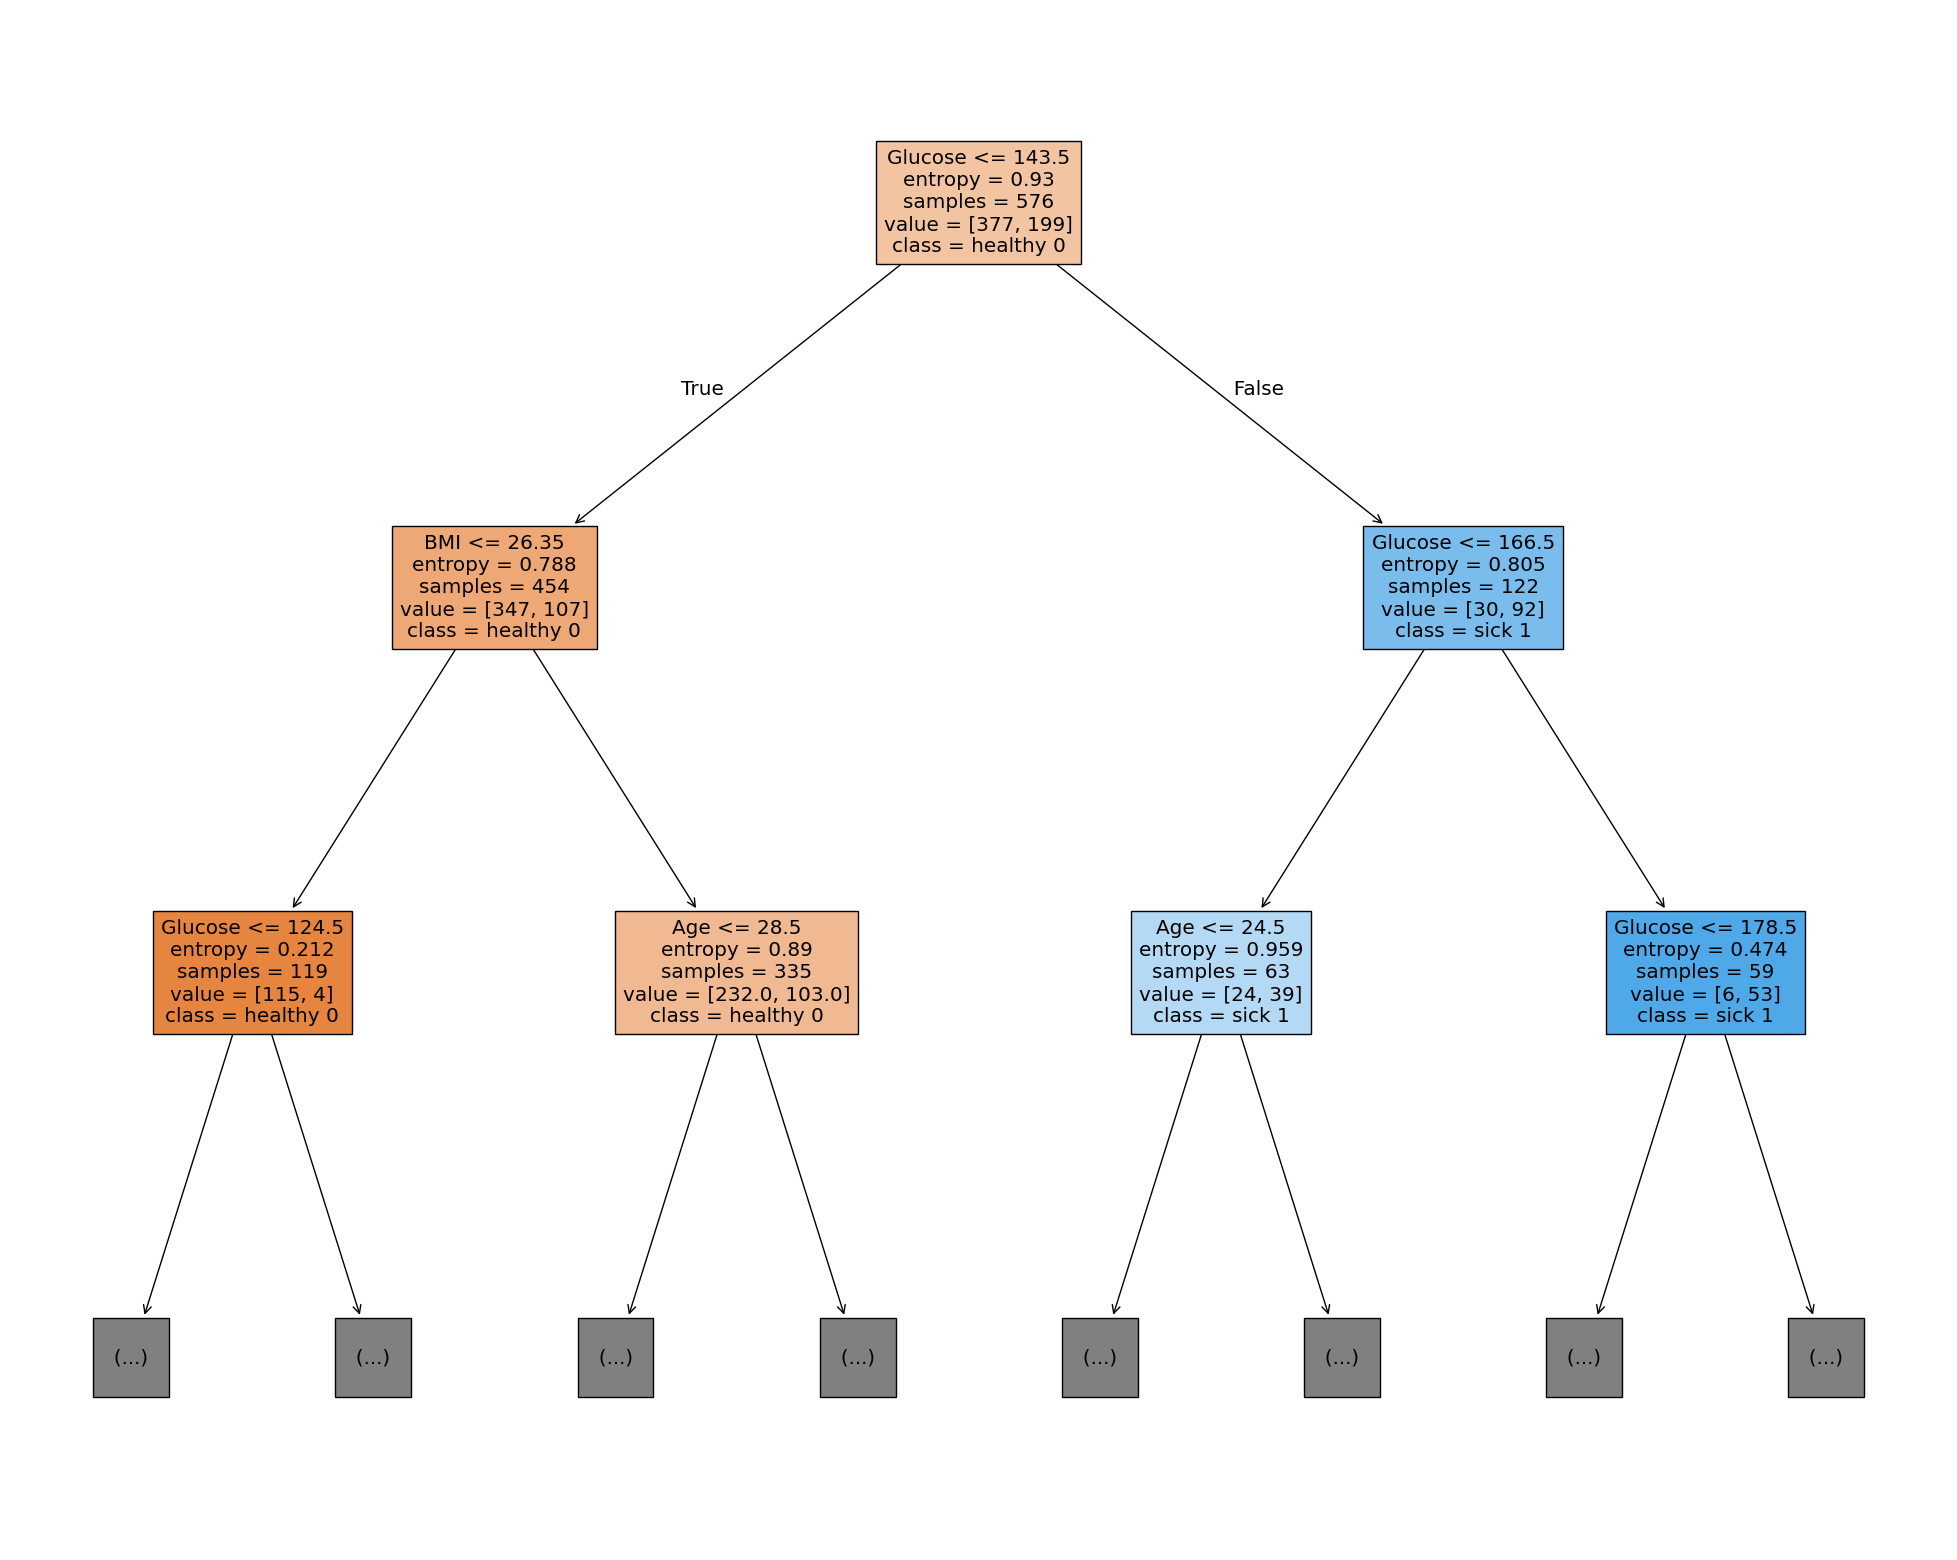

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(entropyDecisionTree,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   max_depth=2,
                   filled=True)

Although the trees are not equal, the obtained result is similar.

The mathematical entropy is defined as:

$$
H(p) = -p \cdot\log_2 p - (1-p)\cdot\log_2(1-p)
$$

where $p$ is the probability of one outcome in a binary event.

**Definition of Entropy:** Let $D$, the dataset, be a training set of class-labeled observations. Suppose the class label attribute has $m$ distinct values defining $m$ distinct classes, $C_i$ (for $i=1,\dotsc,m$). Let $C_{i,D}$ be the subset of observations of class $C_i$ in $D$ (i.e., $C_{i,D} = C_i \cap D$). Let $|D|$ and $|C_{i,D}|$ denote the number of observations in $D$ and $C_{i,D}$ respectively.


The expected information needed to classify an observation in $D$ is given by

$$
H(D) = -\sum_{i=1}^m p(x_i)\log_2p(x_i),
$$

where $p(x_i)$ is the probability that an arbitrary observation in $D$ belongs to class $C_i$ and is $p(x_i)=\frac{|C_{i,D}|}{|D|}$

 - Low Entropy at Extremes: When $p$ is near $0$ or $1$, the entropy is low, as the outcome is nearly certain.

 - High Entropy at Midpoint: When $p=0.5$, the entropy is maximized, reflecting maximum uncertainty (the event is equally likely to belong to either class).

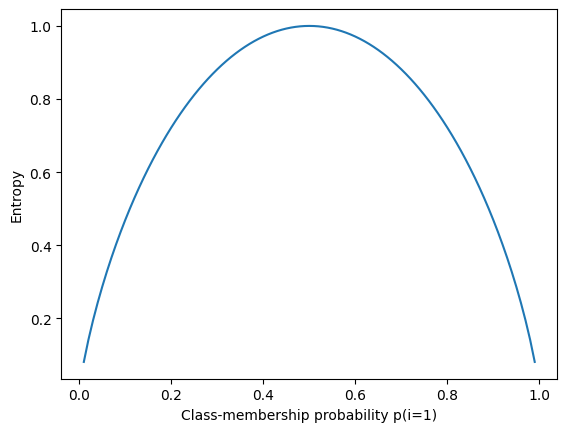

In [ ]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

x = np.arange(0.0, 1.0, 0.01)

'''
log2(p) for p=0,1 is undefined. Hence, the code avoids computing entropy at
p=0 or p=1 by assigning None for those cases.
'''
ent = [entropy(p) if p!=0 else None for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

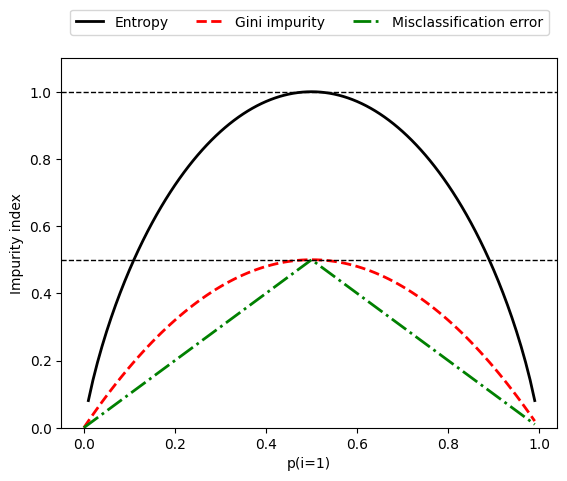

In [ ]:
def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))


def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))


def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x), err],
                          ['Entropy', 'Gini impurity', 'Misclassification error'],
                          ['-', '--', '-.'],
                          ['black', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()

### Pruning of Trees

The overall goal is to minimize the cost-complexity function
\
$$
C_{\alpha}(T)=R(T)=\alpha |T|
$$
where
$|T|$  is the number of leaves in tree $T$ and $R(T)$  a loss function calculated across these leaves.

In [23]:
model=DecisionTreeClassifier() # criterion='gini' (default)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [24]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [25]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.703125


**Pruning** in decision trees is a technique used to reduce the complexity of the model by removing parts of the tree that do not provide significant power in predicting target values. The goal of pruning is to avoid overfitting, where the tree becomes too complex and fits the noise in the data, leading to poor generalization to new data.

Alpha ($α$) is a regularization parameter that controls how much pruning is applied.
 * Higher values of $α$ result in more pruning (i.e., simpler trees).
 * Lower values of $α$ result in less pruning (i.e., more complex trees).

The `cost_complexity_pruning_path` method returns a dictionary containing information about the cost-complexity pruning process. It computes the pruning path for the decision tree, which helps in reducing overfitting by pruning nodes.

In the pruning process, `ccp_alphas` are the values of alpha that correspond to different stages of pruning. The higher the alpha, the more pruning occurs, and the simpler the resulting tree becomes.

In [26]:
path=model.cost_complexity_pruning_path(X_train,y_train) # pruning helps reduce overfitting by simplifying the tree
alphas=path['ccp_alphas'] # higher alpha values result in more pruning
alphas

array([0.        , 0.00113278, 0.00138889, 0.0015191 , 0.00157828,
       0.00160256, 0.00163416, 0.00165536, 0.00166223, 0.00172152,
       0.00208333, 0.00208333, 0.00214947, 0.00217391, 0.00218705,
       0.00226878, 0.00231481, 0.00231481, 0.00231481, 0.00231481,
       0.00231481, 0.00234375, 0.00243056, 0.00257749, 0.00260417,
       0.0026455 , 0.00274725, 0.00277778, 0.00283565, 0.00308499,
       0.00309674, 0.00315657, 0.00322421, 0.00325964, 0.003367  ,
       0.00340888, 0.00356754, 0.00363757, 0.00370711, 0.00398203,
       0.00404875, 0.0040981 , 0.00416667, 0.00447609, 0.00552423,
       0.00558862, 0.00576106, 0.00603701, 0.00619195, 0.00621951,
       0.00674152, 0.00709034, 0.00826262, 0.00835794, 0.00979488,
       0.01338179, 0.01824072, 0.02587027, 0.08973394])

In [27]:
np.max(alphas)

0.08973394008064434

In [28]:
acc_train, acc_test = [], []

for i in alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy_score(y_test,y_test_pred_t))

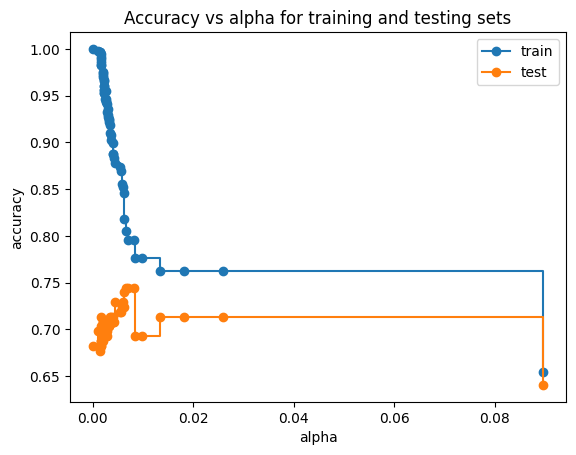

In [29]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, acc_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, acc_test, marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

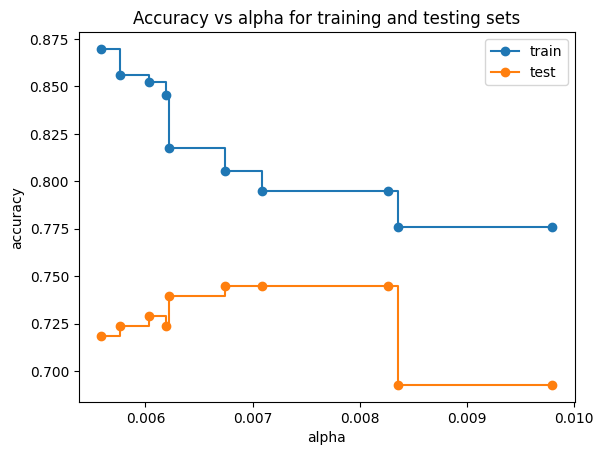

In [30]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas[45:55], acc_train[45:55], marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas[45:55], acc_test[45:55], marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

In this case, since it's not entirely clear which alpha to choose (due to the lines not being very close to each other), we'll select the alpha that maximixes the accuracy in the test set

In [31]:
best_accuracy = 0
best_pruned_model = None
best_alpha=0
acc_train,acc_test=[],[]

for i in alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  accuracy=accuracy_score(y_test,y_test_pred_t)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy)
  if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_alpha = i
        best_pruned_model = t

accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)
print("Best alpha:", best_alpha)

Accuracy after pruning: 0.7447916666666666
Best alpha: 0.008262622609898407


In [32]:
best_ccp_model=DecisionTreeClassifier(ccp_alpha=best_alpha)
best_ccp_model.fit(X_train,y_train)
y_test_pred_best=best_ccp_model.predict(X_test)

In [33]:
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_best))
print(confusion_matrix(y_test, y_test_pred_best))

Accuracy Score:  0.7447916666666666
[[98 25]
 [24 45]]


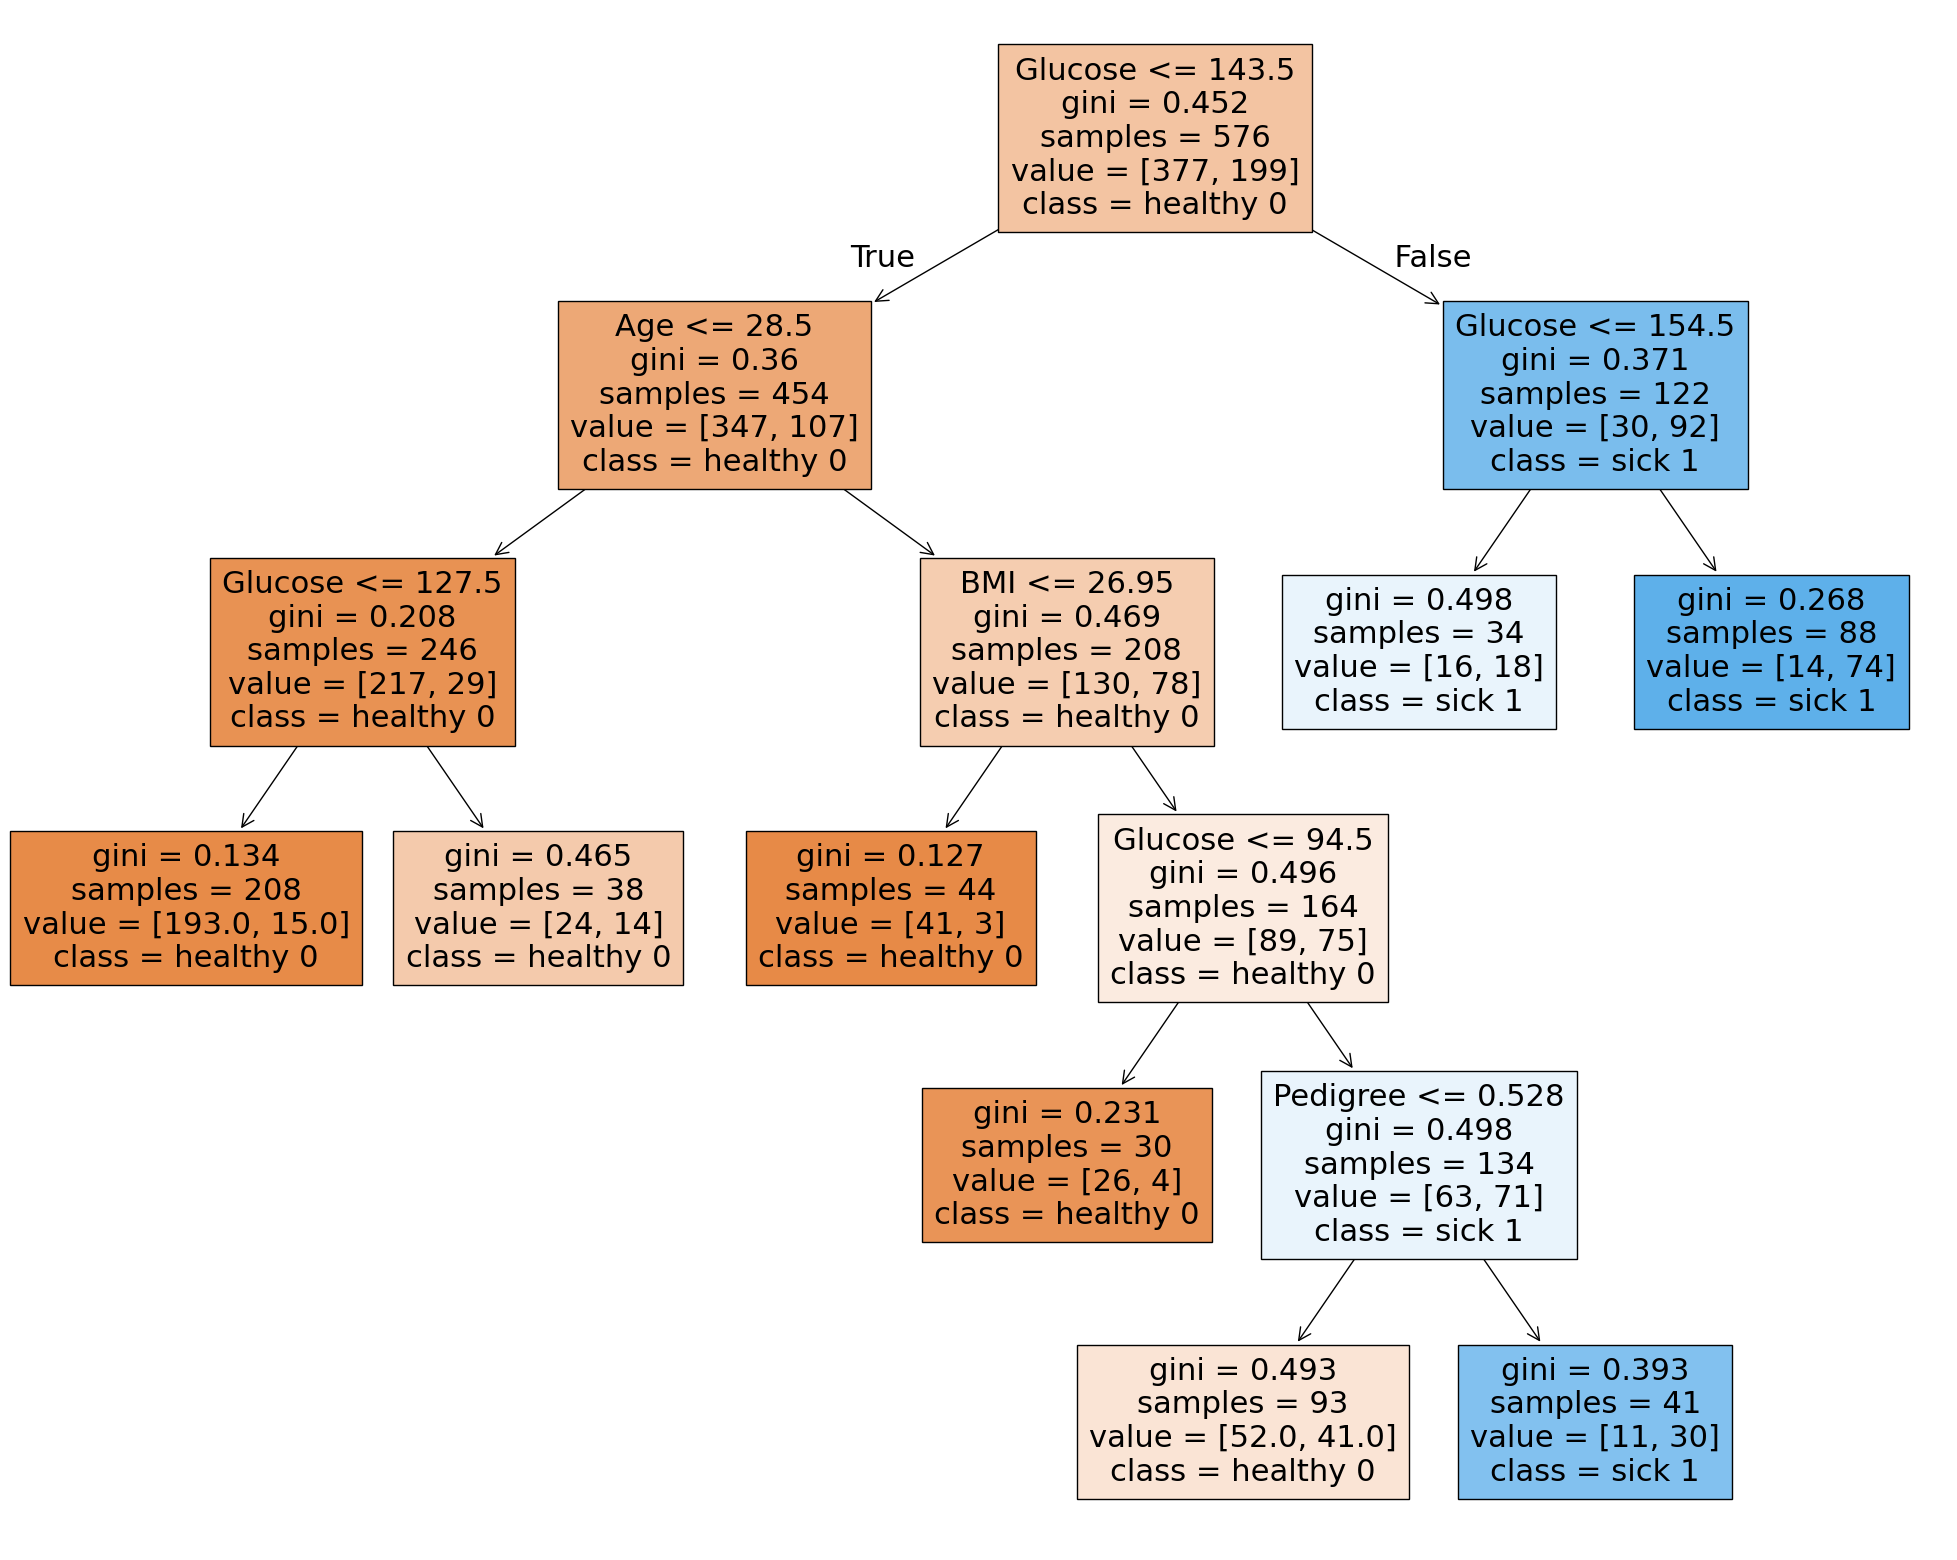

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_ccp_model,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   filled=True)

### Hyperparameter tuning

Hyperparameter tuning is a technique that uses `GridSearchCV`. Hyperparameter tuning involves searching for the optimal hyperparameters for a machine learning model to improve its performance. It does not directly prune the decision tree, but it helps in finding the best combination of hyperparameters. (More about this is taugh in Lesson9)

In [35]:
parameter = {
    'criterion' :['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7]
}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model, param_grid=parameter)
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [36]:
best_estimator = gs.best_estimator_
gs.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [37]:
gs.score(X_test,y_test)

0.6875

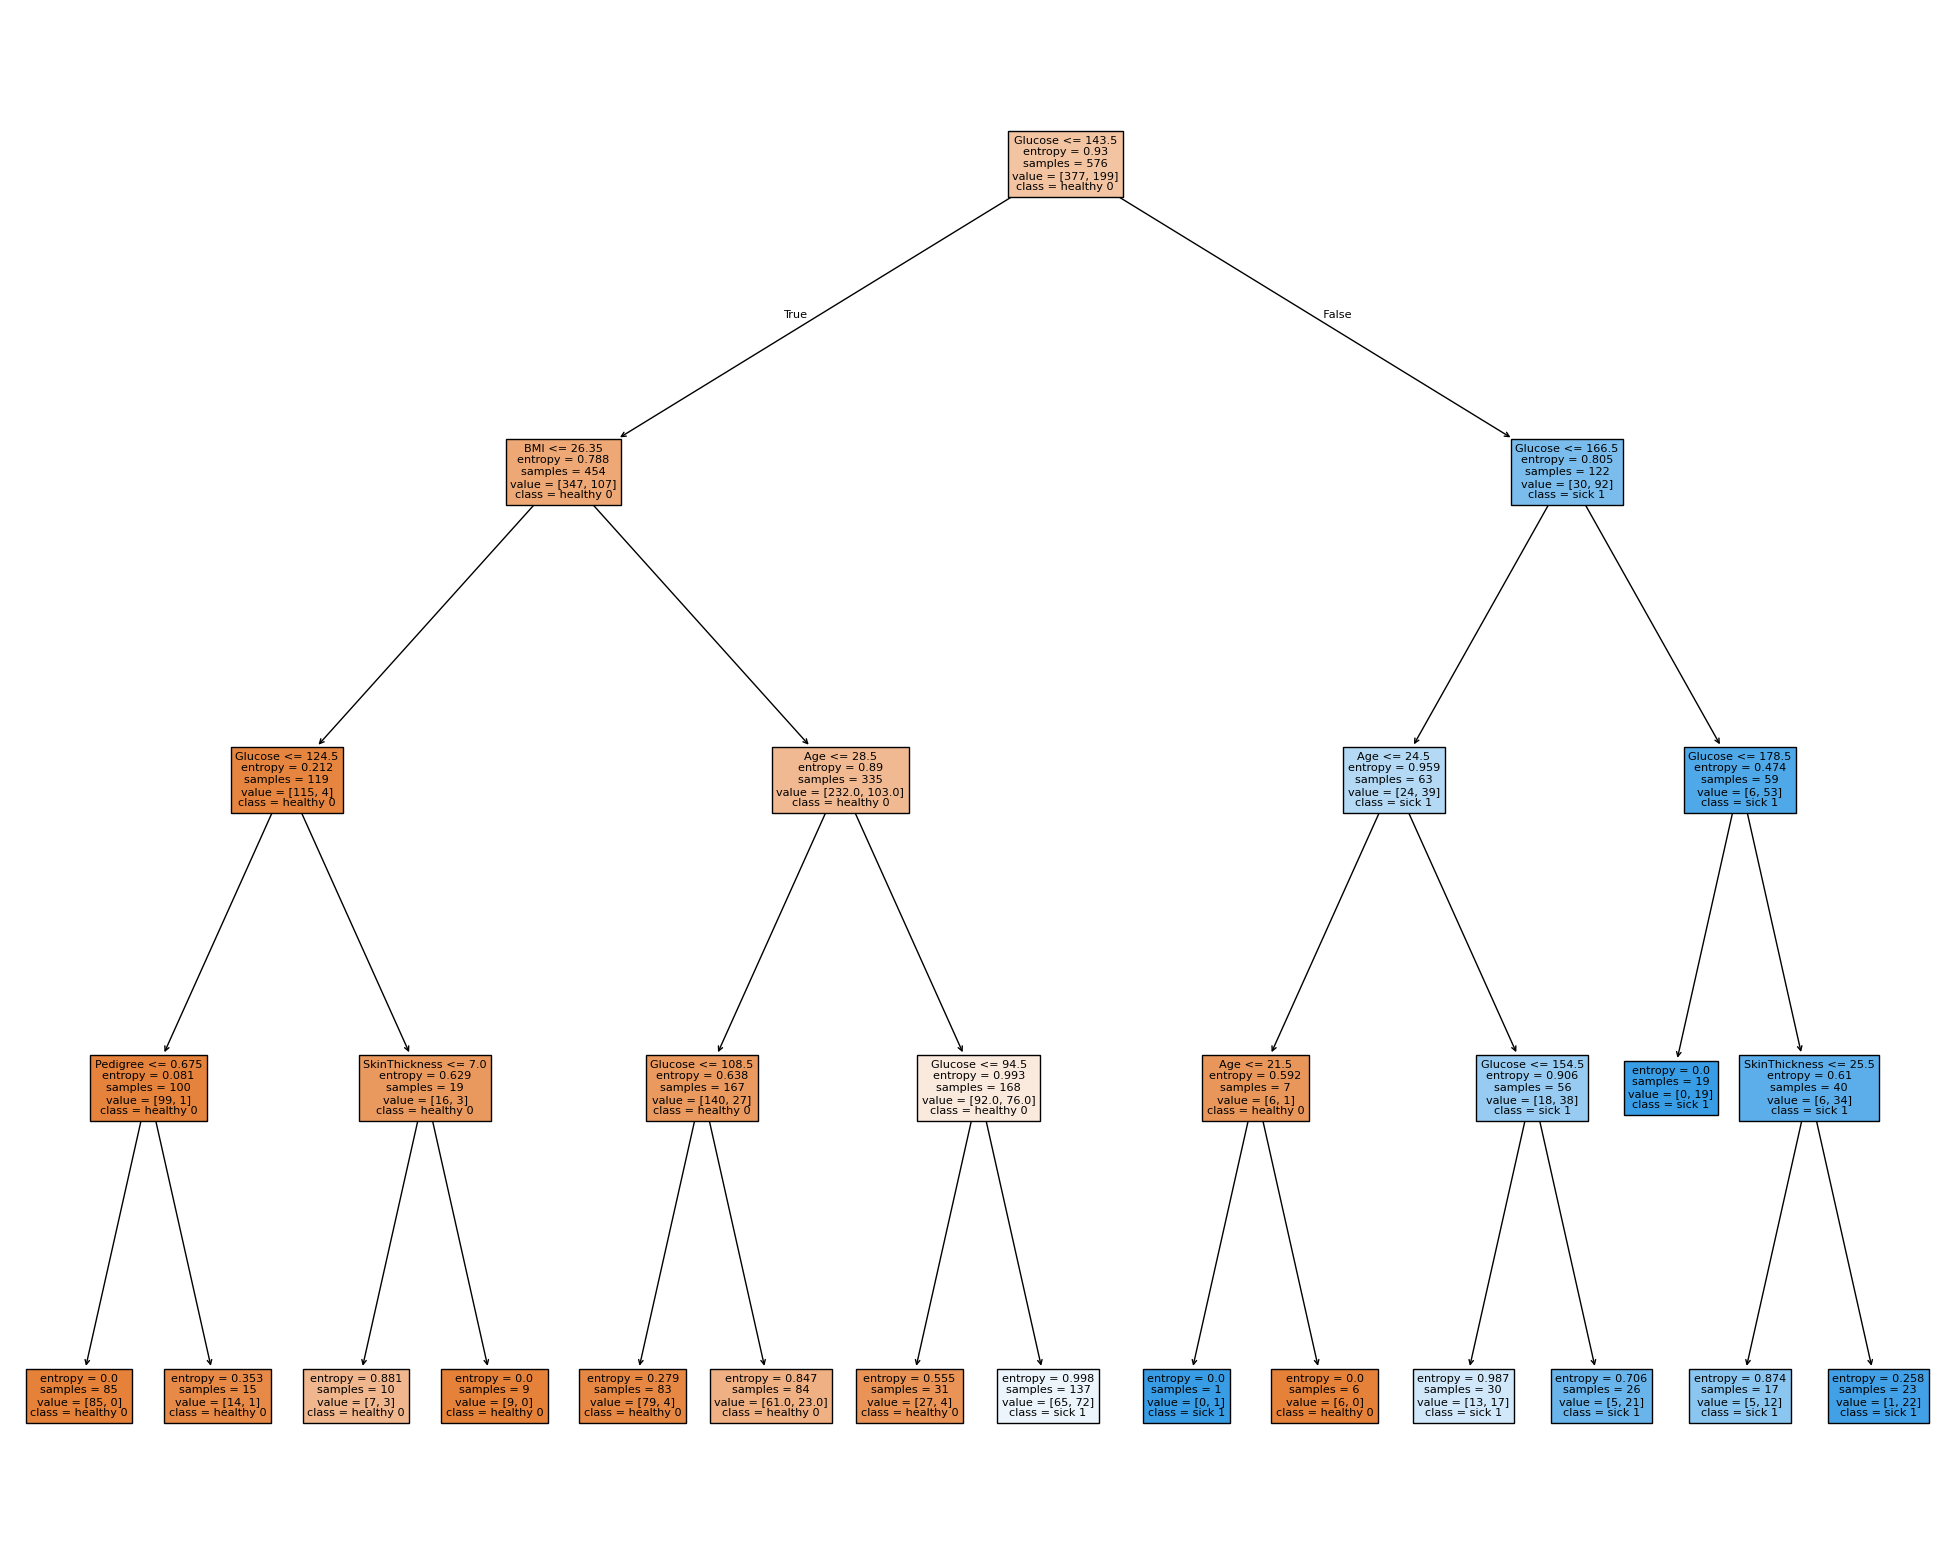

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_estimator,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   filled=True)

### Evaluation of a model

In [156]:
m_01 = DecisionTreeClassifier(criterion='gini', random_state=1)
m_01.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [157]:
m_01Pred = m_01.predict(X_test)

In [158]:
print(confusion_matrix(y_test, m_01Pred))

[[86 37]
 [22 47]]


In [159]:
print('Accuracy Score: ', accuracy_score(y_test, m_01Pred))

Accuracy Score:  0.6927083333333334


#### Cross-validation

The `cross_val_score` function performs $k$-fold cross-validation, where the training data is split into $k$ subsets (folds). Each fold is used once as a validation set, and the remaining $k-1$ folds are used for training

* `m_01`: The machine learning model being evaluated.
* `X_train` and `y_train`: The features and target labels of the training dataset.
* `cv=10`: Specifies that 10-fold cross-validation will be used. This means the training data is divided into 10 subsets. Each subset is used as a validation set once, while the other 9 subsets are used to train the model.
* `scoring="accuracy"`: Accuracy is used as the evaluation metric for each fold.

Output (`score`):

* `score` is an array containing the accuracy for each fold (10 values in this case).

In [160]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(m_01, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:', score)
print('Average score:',score.mean())

Scores for each fold are: [0.74137931 0.77586207 0.77586207 0.60344828 0.72413793 0.77586207
 0.70175439 0.70175439 0.66666667 0.75438596]
Average score: 0.7221113127646703


In [161]:
print(f'Average score: {"{:.2f}".format(score.mean())}')

Average score: 0.72


**LeaveOneOut**

In [162]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8 ]])
y = np.array([1, 2, 3])
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

LeaveOneOut()
Fold 0:
  Train: index=[1 2]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1]
  Test:  index=[2]


#### Confusion Matrix

By definition, a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus, in binary classification, the count of true negatives (TN) is $C_{0,0}$, false negatives (FN) is $C_{1,0}$, true positives (TP) is $C_{1,1}$ and false positives (FP) is $C_{0,1}$.

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [163]:
cm=confusion_matrix(y_test, m_01Pred )
print(cm)

[[86 37]
 [22 47]]


In [164]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(86, 37, 22, 47)

In [165]:
# this gives all possible outputs of the model
m_01.classes_

array([0, 1])

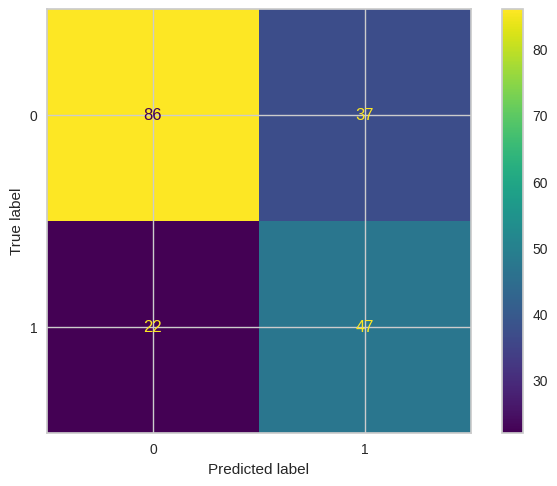

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, m_01Pred, labels=m_01.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m_01.classes_)
disp.plot()
plt.show()

#### Classification report

Build a text report showing the main classification metrics.

 * **Precision**: The proportion of true positive predictions out of all predictions made for a given class. It answers: "When the model predicts a class, how often is it correct?"
$$
\text{Precision}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Positives (FP)}}
$$


 * **Recall** (Sensitivity or True Positive Rate): The proportion of actual positives correctly identified. It answers: "Out of all actual instances of a class, how many were predicted correctly?"
$$
\text{Recall}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Negatives (FN)}}
$$

 * **F1-Score**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall.
$$
\text{F1-Score}=2\cdot \frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}
$$

 * **Support**: The number of true instances of each class in the test data.

In [167]:
from sklearn.metrics import classification_report

print(classification_report(y_test, m_01Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.80      0.70      0.74       123
      Yes(1)       0.56      0.68      0.61        69

    accuracy                           0.69       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.71      0.69      0.70       192



* **Class** `No(0)`:
 - **Precision** (0.80): When the model predicts "No(0)", it is correct 80% of the time.
 - **Recall** (0.70): Of all actual "No(0)" instances, the model correctly identifies 70%.
 - **F1-Score** (0.74): A balance between precision and recall for "No(0)".
 - **Support** (123): There are 123 actual instances of "No(0)" in the test data.

* **Class** `Yes(1)`:
 - **Precision** (0.56): When the model predicts "Yes(1)", it is correct 56% of the time.
 - **Recall** (0.68): Of all actual "Yes(1)" instances, the model correctly identifies 68%.
 - **F1-Score** (0.61): A balance between precision and recall for "Yes(1)".
 - **Support** (69): There are 69 actual instances of "Yes(1)" in the test data.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


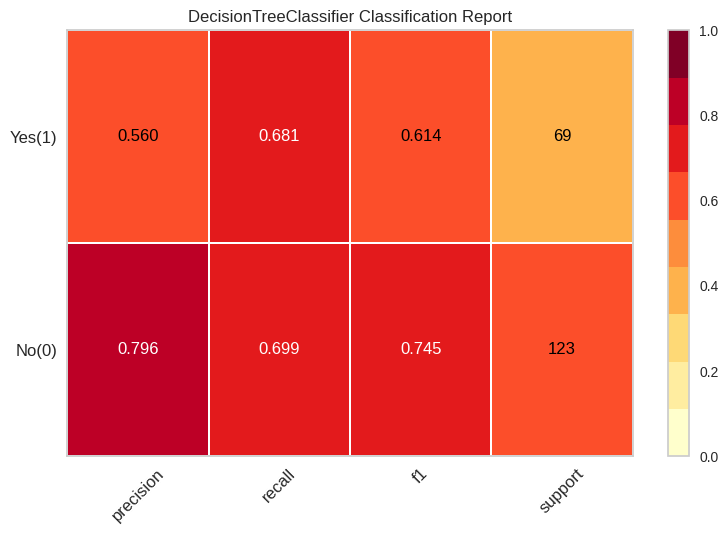

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [168]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(m_01, classes=['No(0)','Yes(1)'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Cohen-Kappa score

Interpreting the **Kappa Score**:
* $\text{Kappa} > 0.75$: Excellent agreement.
* $0.40 < \text{Kappa} ≤ 0.75$: Fair to good agreement.
* $\text{Kappa} ≤ 0.40$: Poor agreement.

In general,
- 1: Perfect agreement between the predictions and the true labels.
- 0: No agreement beyond what would be expected by chance (random agreement).
- Negative values: Worse than random agreement, indicating that the predictions and true labels disagree more often than expected by chance.

In [169]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, m_01Pred)

0.3630229419703104

#### ROC and AUC

The **Receiver Operating Characterisctic (ROC) Curve** is a graphical plot that illustrates the diagnostic ability of a binary classifier as its decision threshold is varied. It plots:
* True Positive Rate (TPR) on the $Y$-axis:
$$
\text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}}
$$
* False Positive Rate (FPR) on the $X$-axis:
$$
\text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}}
$$

Key Points:
* A model with perfect classification has a point at $(0,1)$, meaning no false positives and maximum true positives.

* A diagonal line from $(0,0)$ to $(1,1)$ represents random guessing (baseline model).

* A good classifier's ROC curve hugs the top-left corner of the plot, indicating a high TPR and low FPR.

The **Area Under the Curve (AUC)** is a single scalar value summarizing the ROC curve. It measures the model's ability to distinguish between classes.

Key Points:
* Range: AUC values range from 0 to 1.
  - $1.0$: Perfect classifier.
  - $0.5$: Random guessing (e.g., flipping a coin).
  - $< 0.5$: Worse than random guessing, indicating systematic error.
* Interpretation: An AUC of $0.9$ means that $90\%$ of the time, the model assigns a higher score to a positive instance than to a negative one.

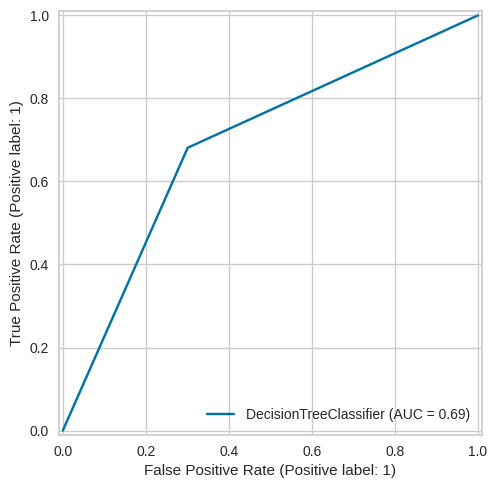

In [170]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(m_01, X_test, y_test)

In [171]:
from sklearn.metrics import det_curve
fpr, fnr, thresholds = det_curve(y_test, m_01Pred)
print(fpr)
print(fnr)
print(thresholds)

[1.         0.30081301]
[0.         0.31884058]
[0 1]


In [172]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, m_01Pred)

0.6901732060798869

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


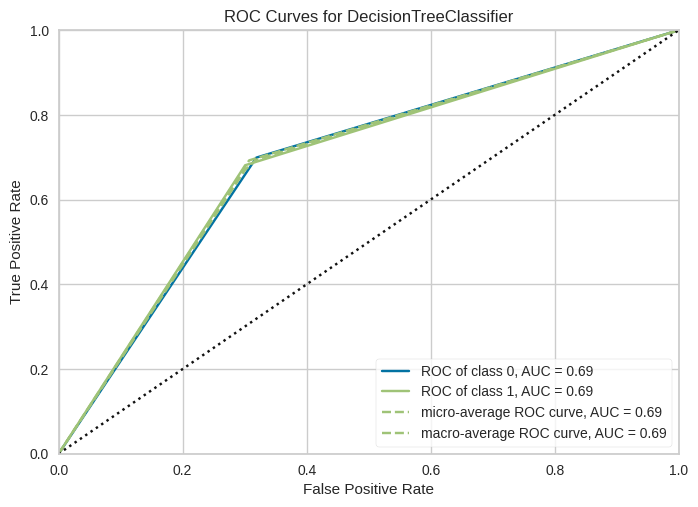

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [173]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(m_01)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


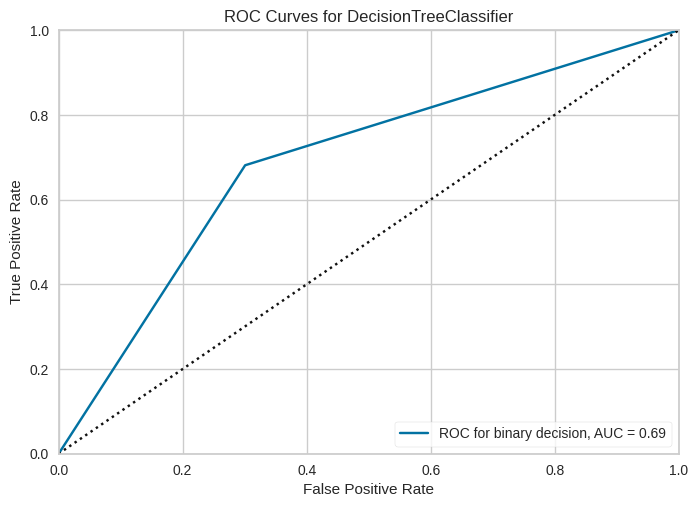

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [174]:
vis = ROCAUC(m_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

## Laboratory Lecture

**Preparation of the dataset**

In [43]:
from google.colab import files
uploaded = files.upload()

Saving sna.csv to sna.csv


In [44]:
data = pd.read_csv('/content/sna.csv')
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

The decision tree usually can handle both numerical and categorical features. The treatment of categorical data becomes crucial during the tree-building process. Categorical features have string values. For example, Gender has two levels either Male or Female.

In this case we have an error saying that it cannot convert string to float. In So learners like logistic regression, distance based methods such as kNN, support vector machines, tree based methods etc. in sklearn needs numeric arrays. **Features having string values cannot be handled by these learners.**

We can use two strategies
* Label Encoding
* One-Hot Encoding

Label encoding involves converting categorical data into numerical format by assigning a distinct integer label to each category or class.

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]

In [46]:
data = data[['Gender', 'Age', 'EstimatedSalary', 'Purchased']] # drop User ID column

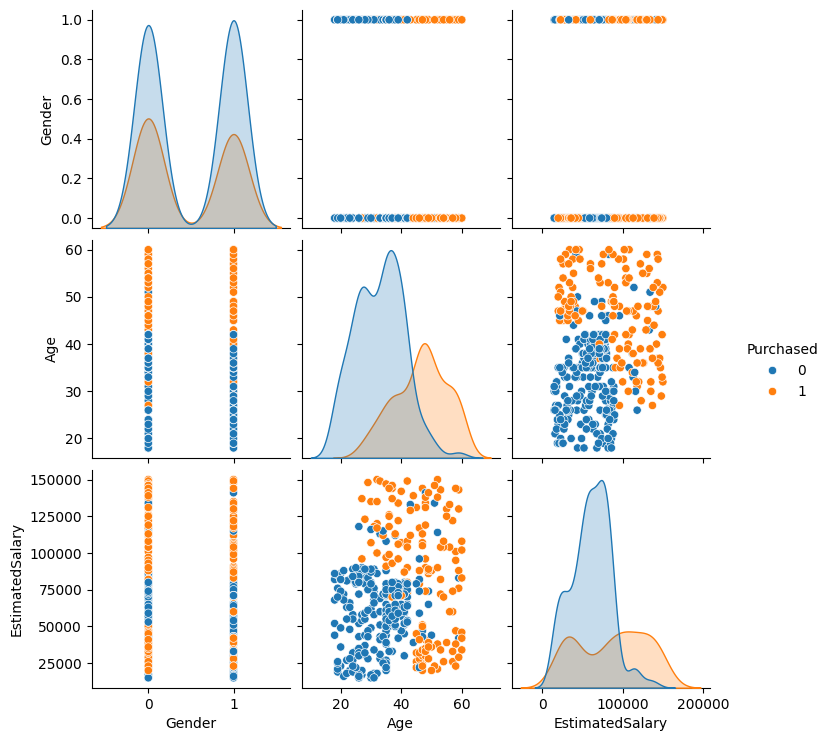

In [47]:
sns.pairplot(data=data, hue='Purchased')
plt.show()

### Test and Training sets

In [48]:
X = data.drop(['Purchased'], axis=1)
y = data['Purchased'] # target variable

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [50]:
# to check the proportion is still ok
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64
Purchased
0    0.646667
1    0.353333
Name: proportion, dtype: float64
Purchased
0    0.63
1    0.37
Name: proportion, dtype: float64


### Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_01 = DecisionTreeClassifier() # criterion='gini' by default
model_01.fit(X_train, y_train)

DecisionTreeClassifier()

#### Prediction

In [52]:
pred_01 = model_01.predict(X_test)
pred_01[:5]

array([1, 1, 0, 0, 0])

In [53]:
model_01.predict(pd.DataFrame({'Gender':[1], 'Age':[30], 'EstimatedSalary':[77000]}))

array([0])

#### Evaluation

We use the confusion matrix:

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_01) # this is the way

array([[57,  6],
       [ 7, 30]])

In [55]:
confusion_matrix(pred_01, y_test) # this is not

array([[57,  7],
       [ 6, 30]])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_01)

0.87

#### Visualization

[Text(0.5182926829268293, 0.9666666666666667, 'Age <= 42.5\ngini = 0.457\nsamples = 300\nvalue = [194.0, 106.0]'),
 Text(0.2926829268292683, 0.9, 'EstimatedSalary <= 90500.0\ngini = 0.289\nsamples = 217\nvalue = [179, 38]'),
 Text(0.4054878048780488, 0.9333333333333333, 'True  '),
 Text(0.1951219512195122, 0.8333333333333334, 'Age <= 36.5\ngini = 0.074\nsamples = 182\nvalue = [175, 7]'),
 Text(0.17073170731707318, 0.7666666666666667, 'gini = 0.0\nsamples = 121\nvalue = [121, 0]'),
 Text(0.21951219512195122, 0.7666666666666667, 'EstimatedSalary <= 83500.0\ngini = 0.203\nsamples = 61\nvalue = [54, 7]'),
 Text(0.1951219512195122, 0.7, 'EstimatedSalary <= 67500.0\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.17073170731707318, 0.6333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.21951219512195122, 0.6333333333333333, 'Age <= 41.5\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.14634146341463414, 0.5666666666666667, 'EstimatedSalary <= 70500.0\ngini = 0

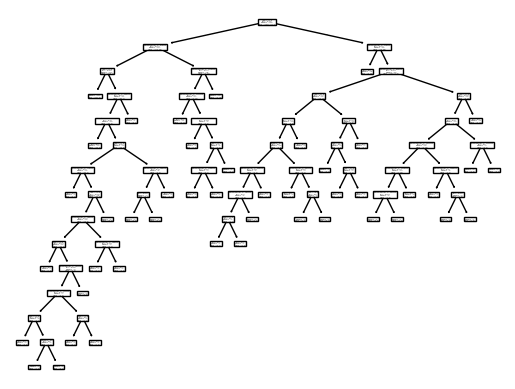

In [57]:
from sklearn import tree

features = ['Gender', 'Age', 'EstimatedSalary']  # names of our variables
tree.plot_tree(model_01, feature_names=features) # silhouette of the tree

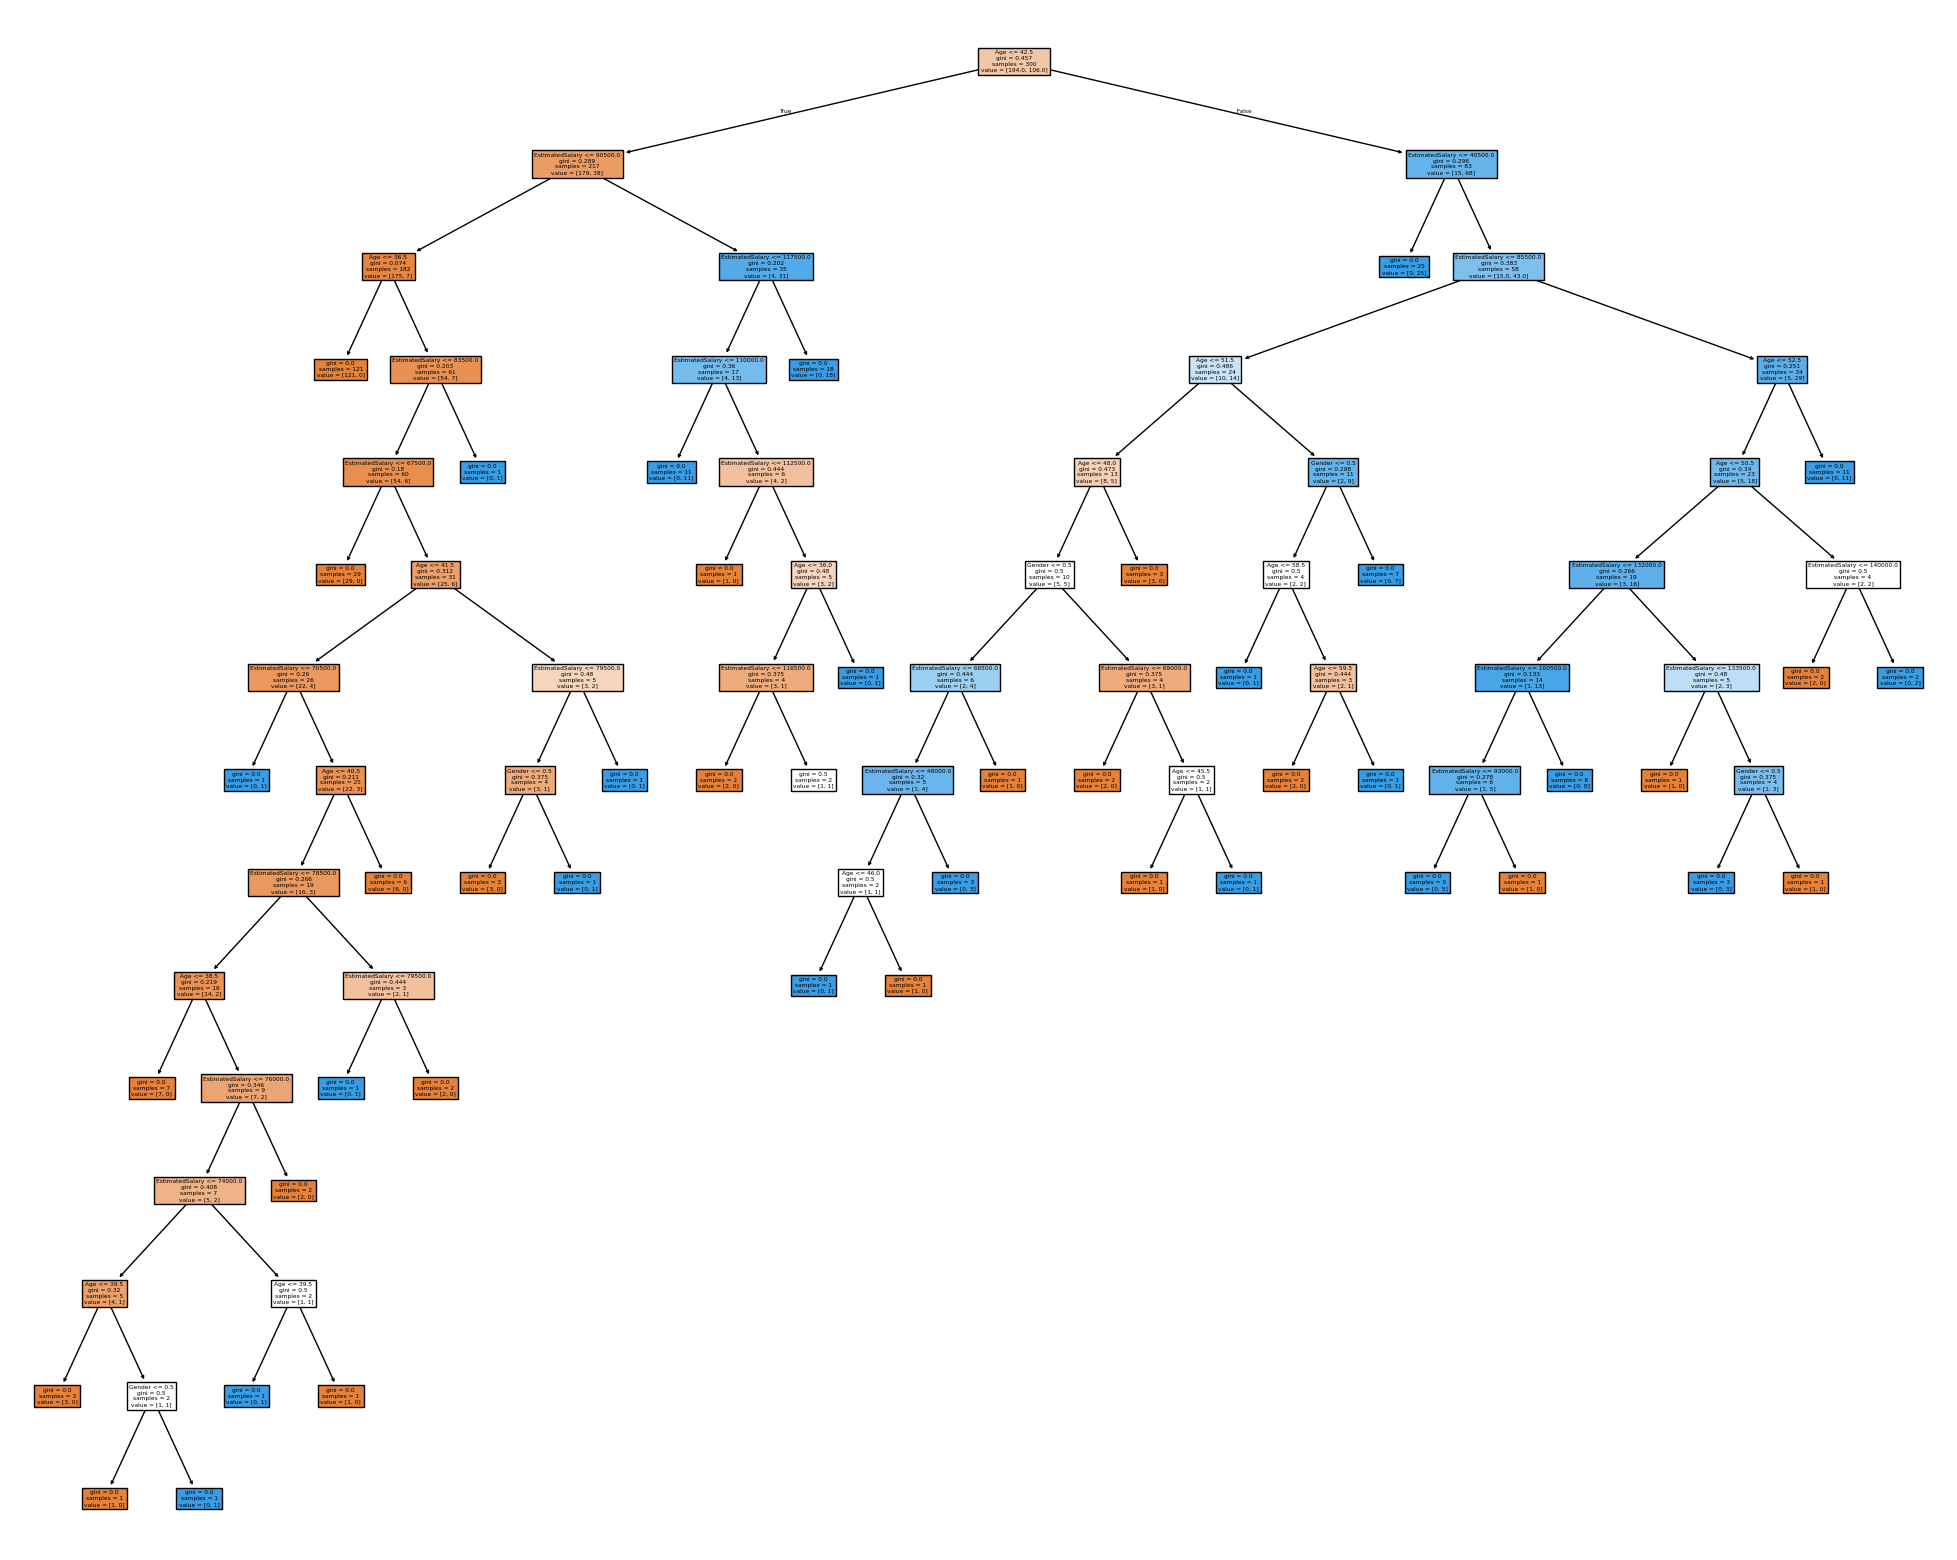

In [58]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   filled=True)

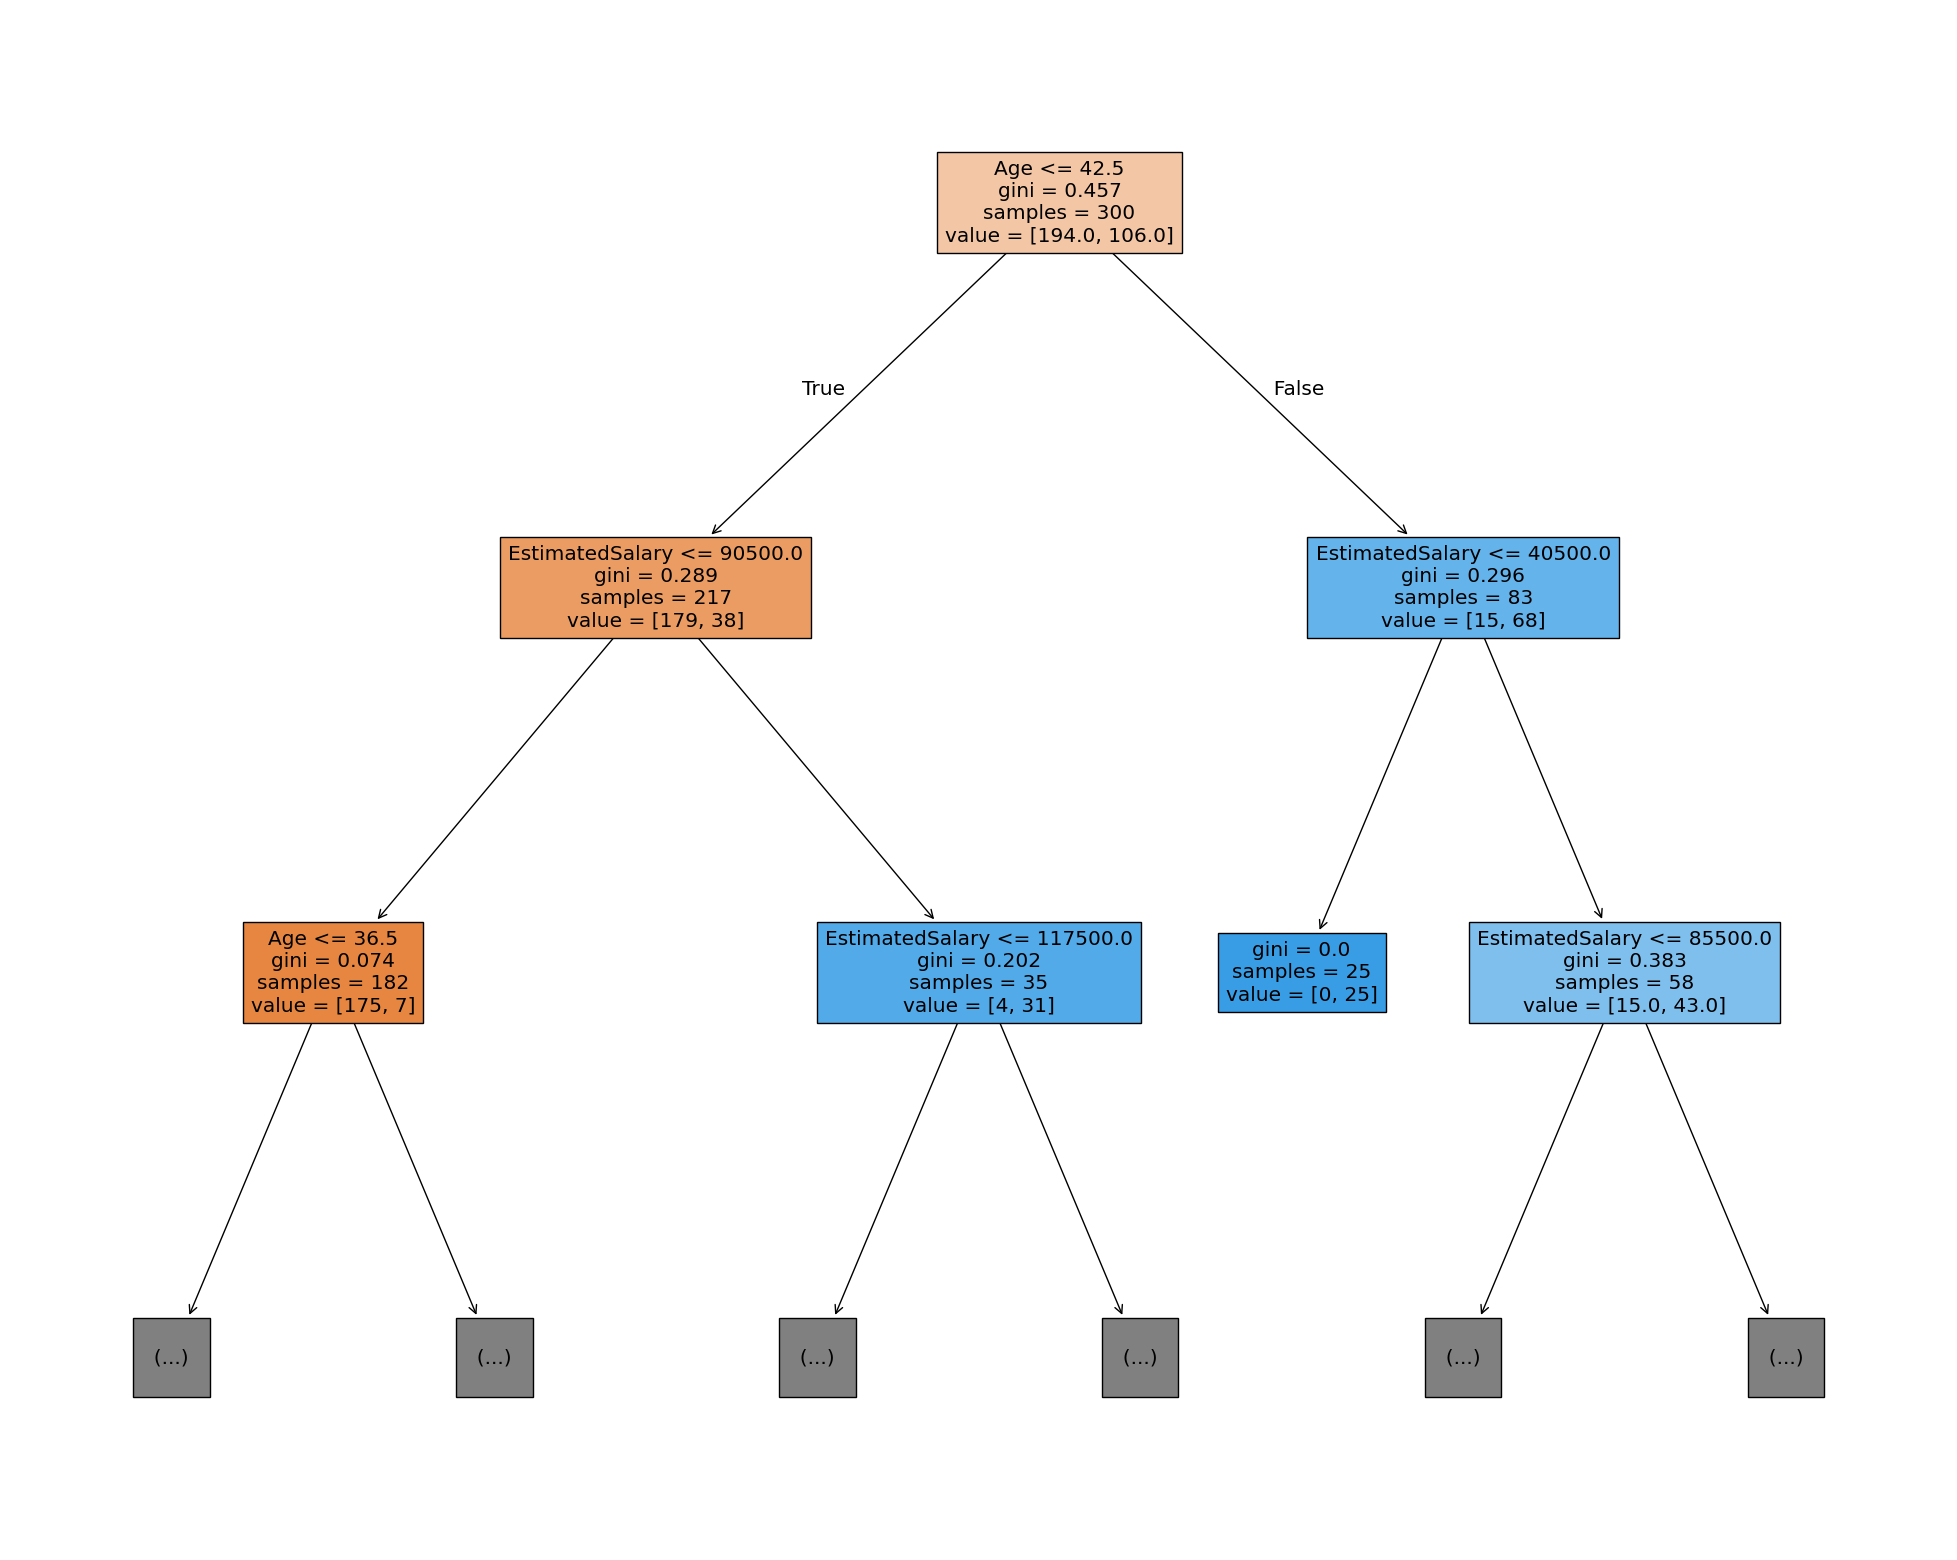

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   max_depth=2,
                   filled=True)

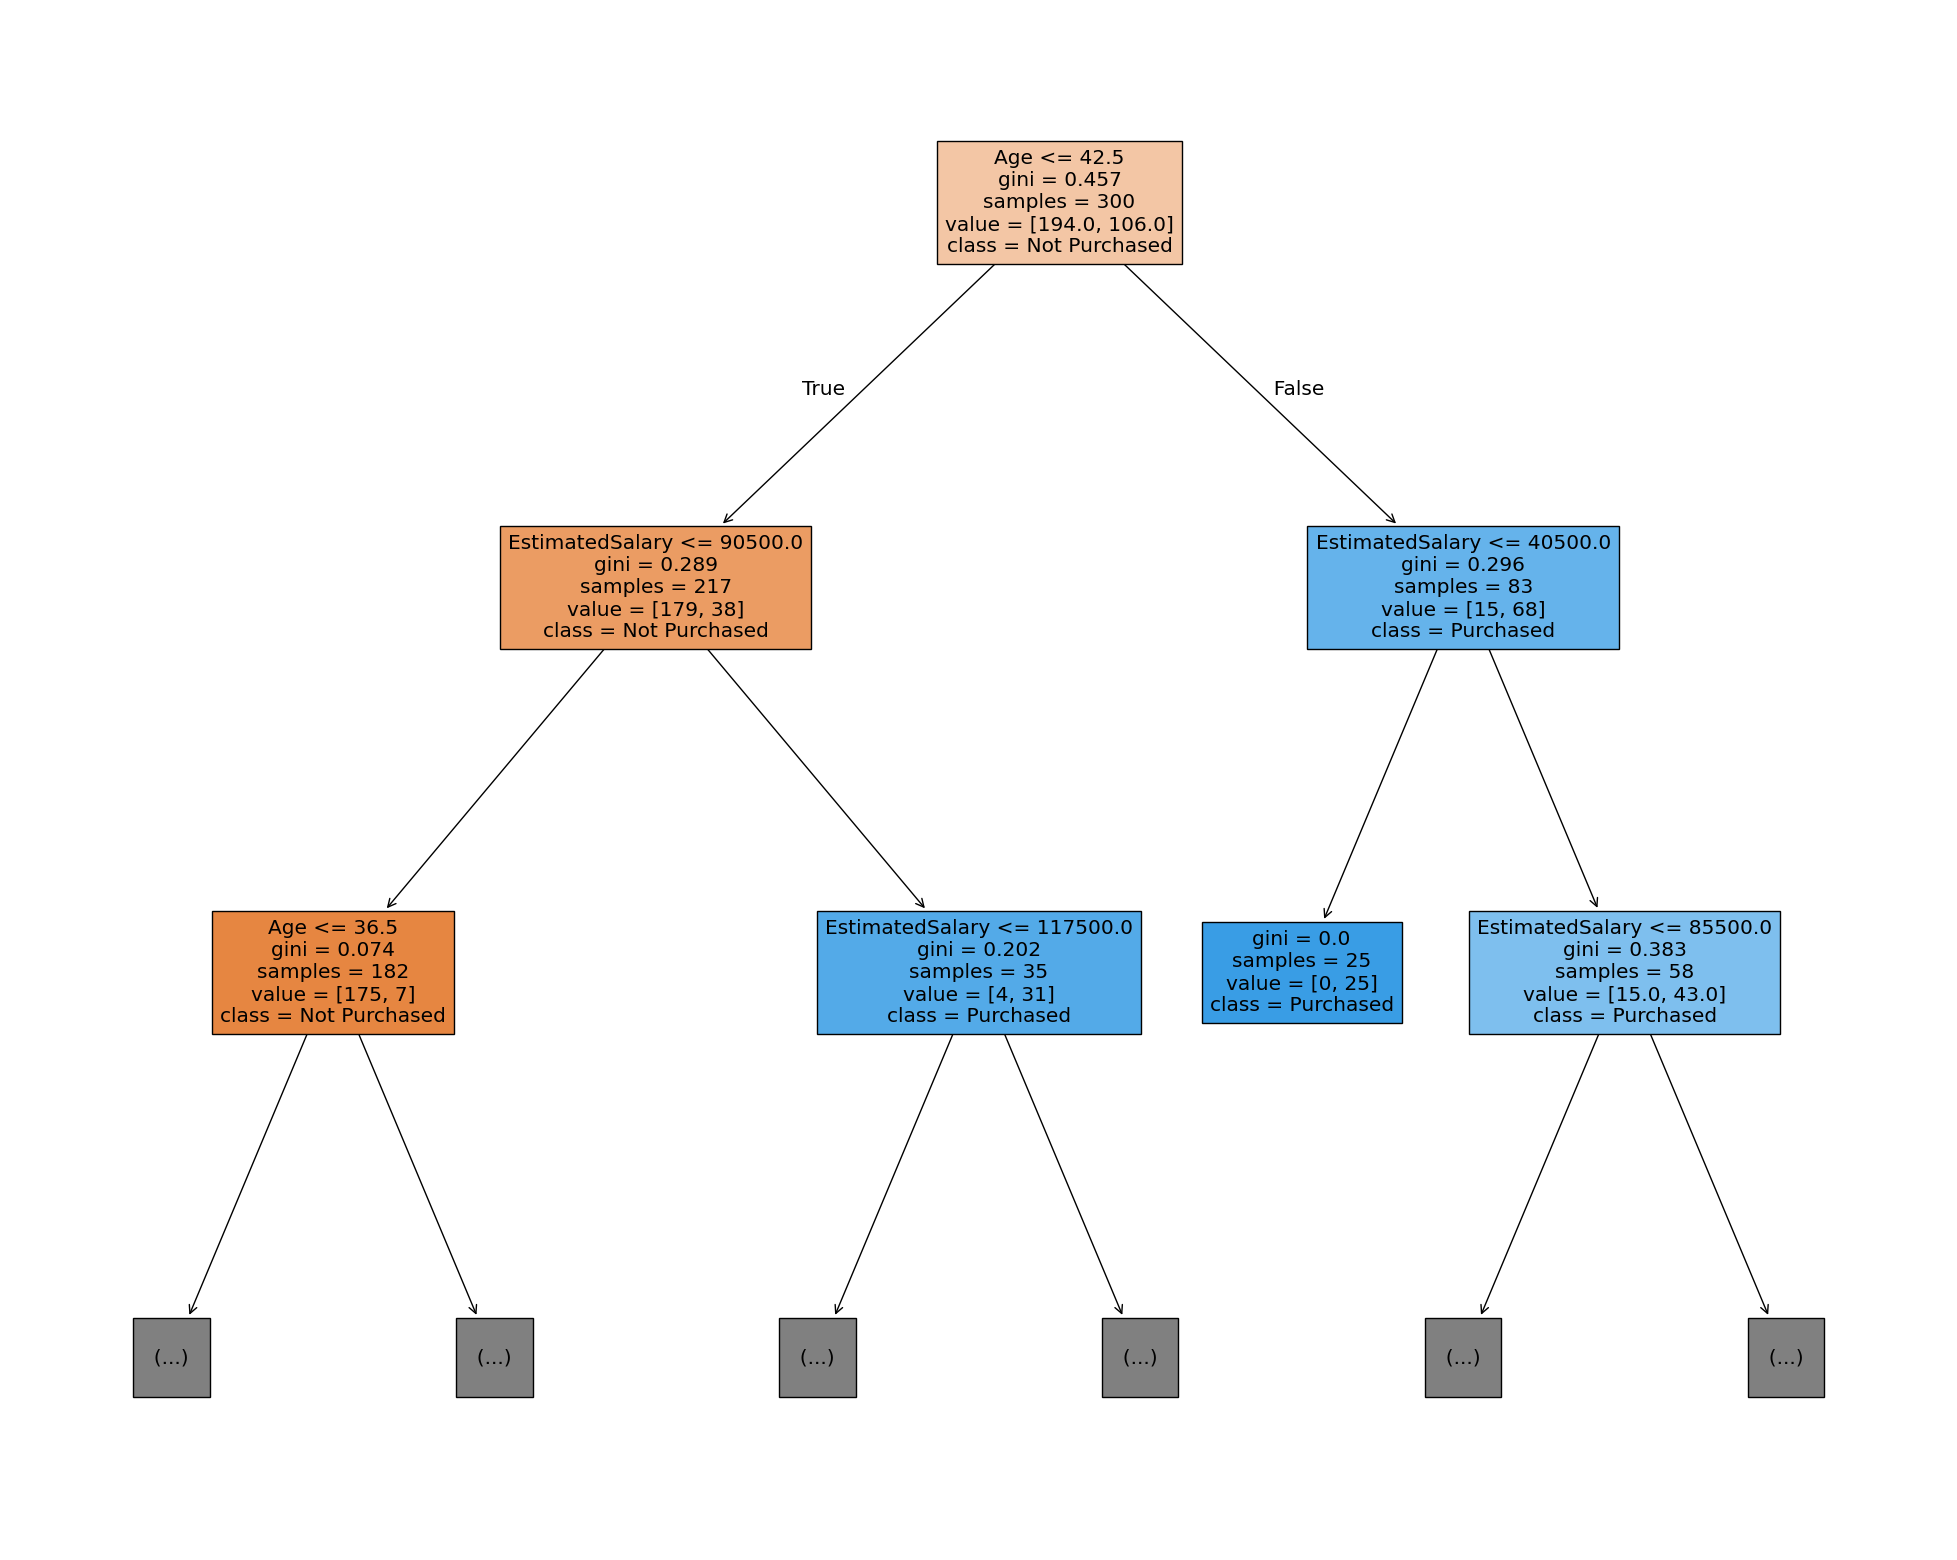

In [60]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   max_depth=2,
                   class_names=['Not Purchased', 'Purchased'],
                   filled=True)

In [61]:
text_tree = tree.export_text(model_01,
                             feature_names=features,
                             max_depth=2)
print(text_tree)

|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- truncated branch of depth 12
|   |--- EstimatedSalary >  90500.00
|   |   |--- EstimatedSalary <= 117500.00
|   |   |   |--- truncated branch of depth 5
|   |   |--- EstimatedSalary >  117500.00
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- EstimatedSalary <= 40500.00
|   |   |--- class: 1
|   |--- EstimatedSalary >  40500.00
|   |   |--- EstimatedSalary <= 85500.00
|   |   |   |--- truncated branch of depth 7
|   |   |--- EstimatedSalary >  85500.00
|   |   |   |--- truncated branch of depth 6



[Model parameters](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [62]:
model_01.get_params() # check what parameters were used to build this model
# model_01 is not perfect. It is very overfitted (we talk more about this in the next lesson)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### New model

In [63]:
model_02 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3)
model_02.fit(X_train, y_train)
pred_02 = model_02.predict(X_test)

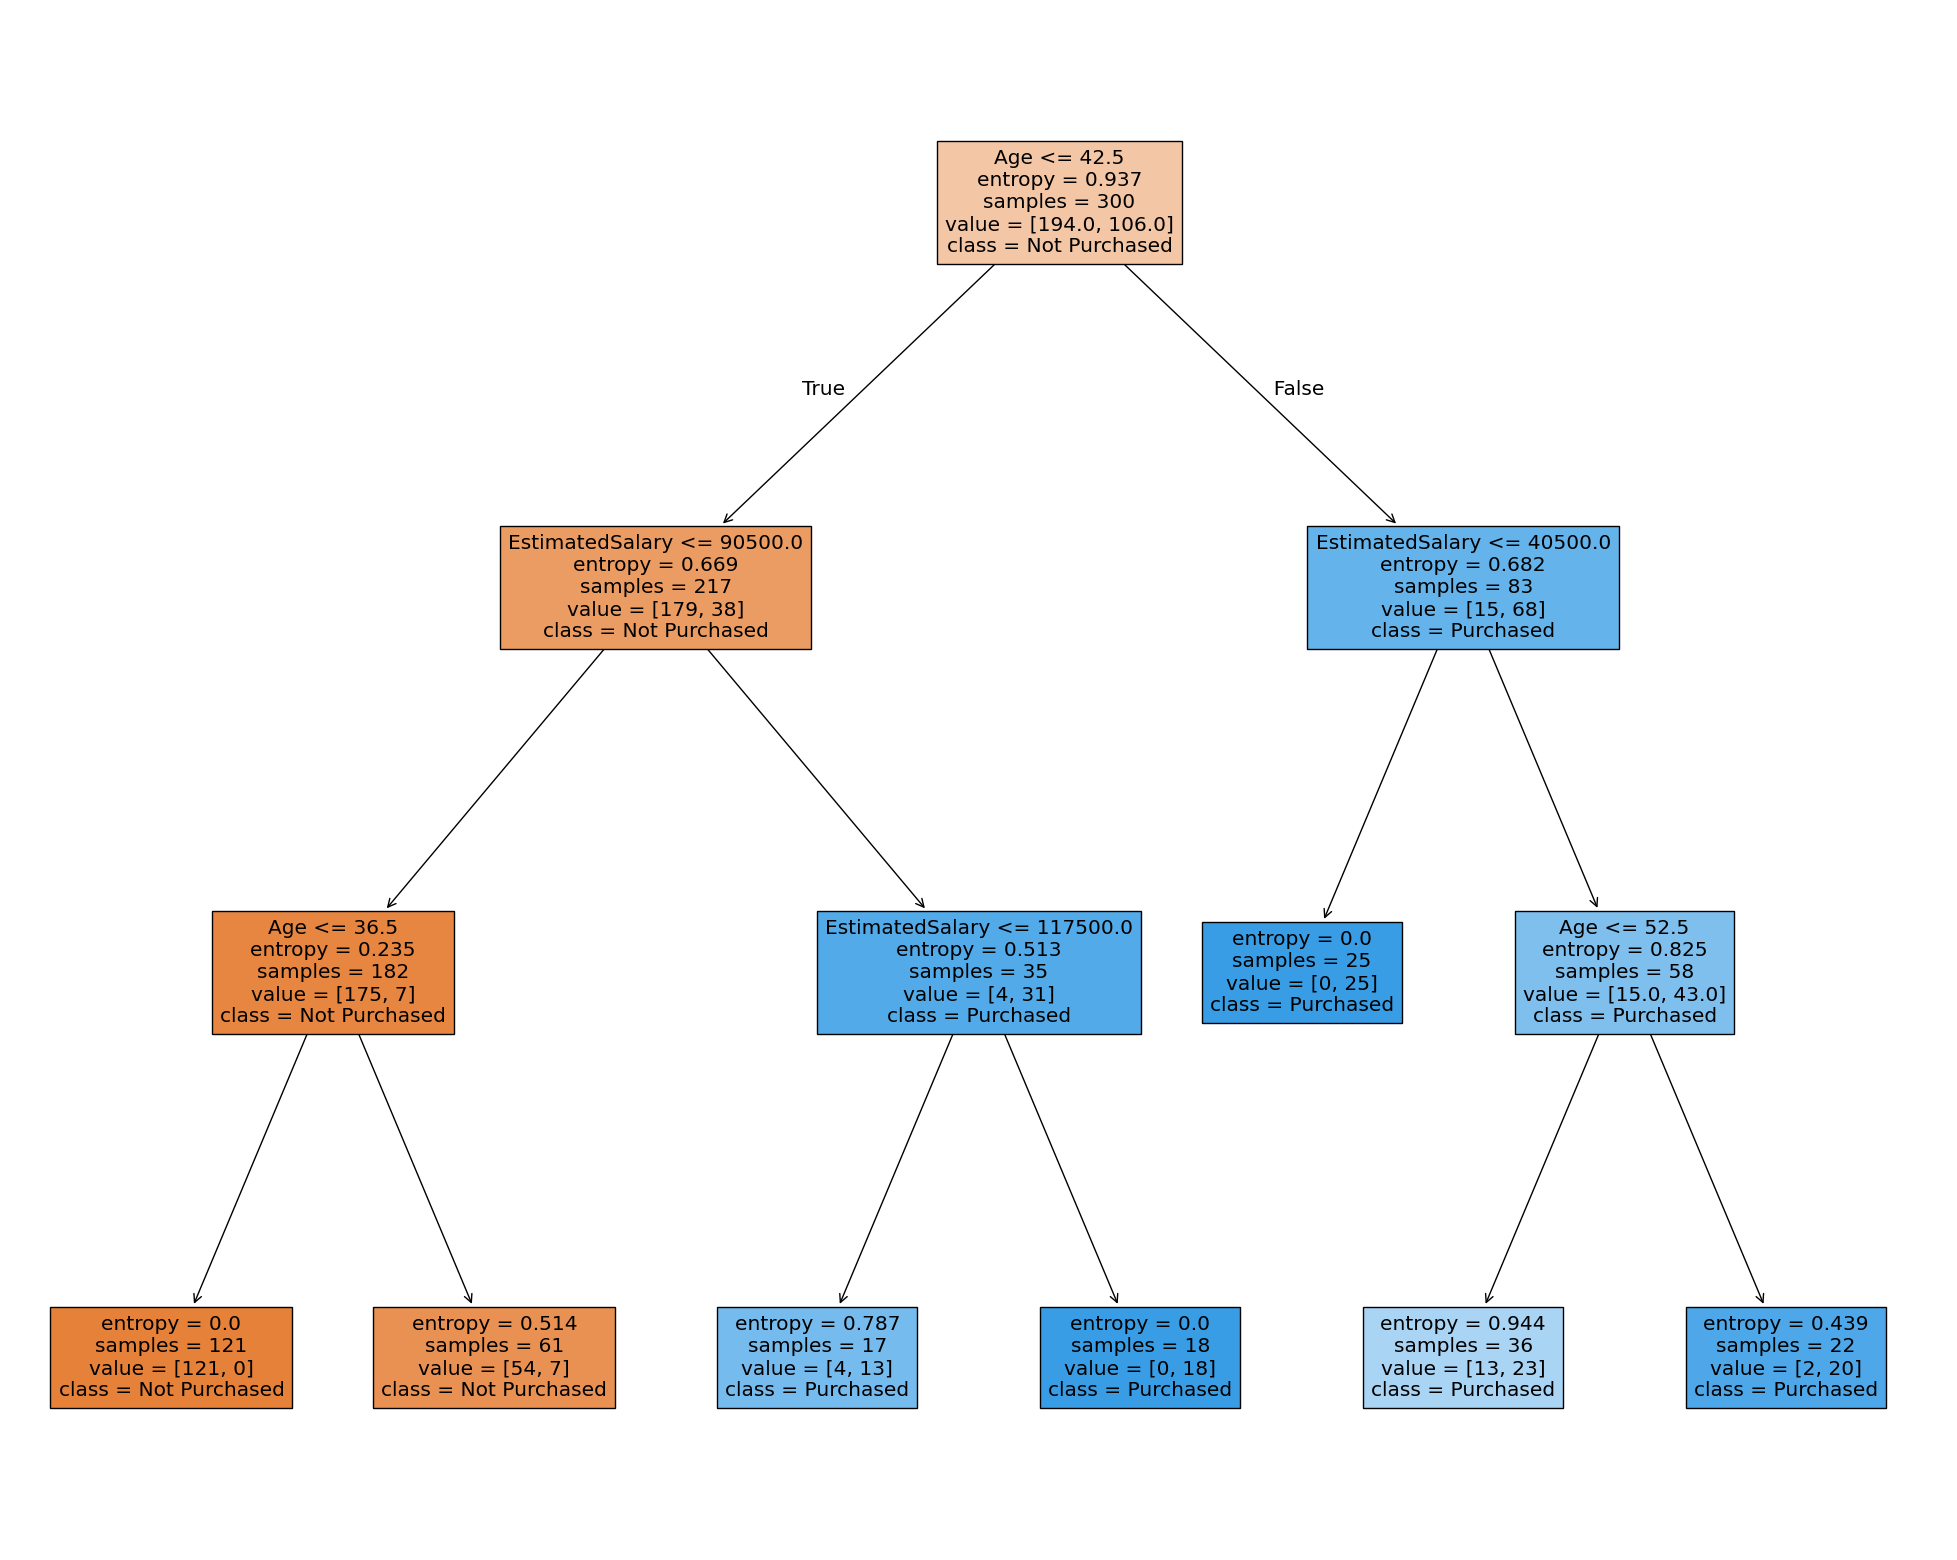

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_02,
                   feature_names=features,
                   class_names=['Not Purchased', 'Purchased'],
                   filled=True)

In the **root** we have the following:
1. Condition
2. entropy/gini etc in the whole dataset
3. Number of samples: 300, of which 194 Not Purchased and 106 Purchased

In [65]:
print(confusion_matrix(y_test, pred_02))

[[57  6]
 [ 2 35]]


In [66]:
accuracy_score(y_test, pred_02) # better in this second model

0.92

In [67]:
pred2_train = model_02.predict(X_train)
accuracy_score(y_train, pred2_train) # almost the same as in the test, so it is much better than the first model

0.9133333333333333

In [68]:
pred1_train = model_01.predict(X_train)
accuracy_score(y_train, pred1_train) # in the test the result was much smaller (0.86), so the first model is overfitted

0.9966666666666667

We'll see all this in the Lesson 8, but for now it's worth saying that the first model is over-fitted (difference between `pred_01` and `pred1_train` is quite big), while the second model is optimal since the accuracies in test and train sets are similar (values of `pred_02` and `pred2_train` are close)

### Find observations in the leaf

 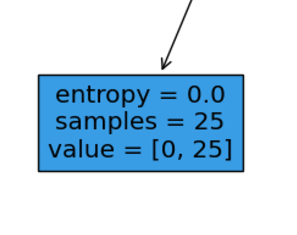

In [69]:
df = X_train.copy()
df['Purchased'] = y_train
df

Gender  Age  EstimatedSalary  Purchased
247       0   57           122000          1
110       0   39            71000          0
16        1   47            25000          1
66        1   24            19000          0
153       0   36            50000          0
..      ...  ...              ...        ...
71        0   24            27000          0
106       0   26            35000          0
270       0   43           133000          0
348       1   39            77000          0
102       0   32            86000          0

[300 rows x 4 columns]

In [70]:
leaf1 = df.loc[(df.Age > 42.5) & (df.EstimatedSalary <= 40500)]
leaf1

Gender  Age  EstimatedSalary  Purchased
16        1   47            25000          1
19        0   48            29000          1
355       1   60            34000          1
292       1   55            39000          1
386       0   49            39000          1
17        1   45            26000          1
24        1   46            23000          1
375       0   46            32000          1
23        0   45            22000          1
283       0   52            21000          1
384       0   57            33000          1
26        1   49            28000          1
379       0   58            23000          1
389       0   48            35000          1
318       1   45            32000          1
27        0   47            30000          1
300       0   58            38000          1
323       0   48            30000          1
279       0   50            36000          1
390       1   48            33000          1
365       0   59            29000          1
383       1   49            28000          1
397       0   50            20000          1
399       0   49            36000          1
20        1   45            22000          1

In [71]:
leaf1.shape

(25, 4)

### Importance of variables

**Feature Importance**: This metric indicates how much each feature contributes to reducing the impurity in the dataset. Impurity is measured differently depending on the algorithm, e.g., Gini impurity or entropy in decision trees.

In [72]:
model_02.feature_importances_

array([0.        , 0.49257243, 0.50742757])

Text(0, 0.5, 'Variable')

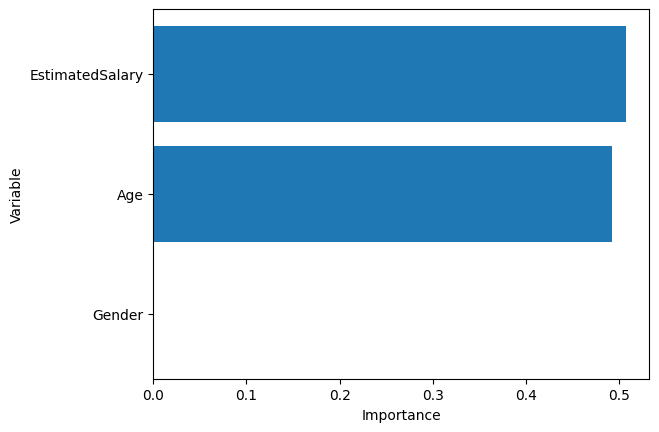

In [73]:
plt.barh(range(3), list(model_02.feature_importances_), align='center')
plt.yticks(np.arange(3), features)
plt.xlabel("Importance")
plt.ylabel("Variable")
# Estimated Salary and Age are the most important

# Lesson 8 (18/12/2024)

## Theory Lecture

In [74]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_wisconsin.csv to breast_cancer_wisconsin.csv


In [75]:
df = pd.read_csv('/content/breast_cancer_wisconsin.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [76]:
# Rename columns to numbers
df.columns = range(df.shape[1])
df

0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...     23      24      25       26       27      28      29  \
0    0.14710  ...  17.33  184.60  2019.0  0.16220  0.66560  0.7119  0.2654   
1    0.07017  ...  23.41  158.80  1956.0  0.12380  0.18660  0.2416  0.1860   
2    0.12790  ...  25.53  152.50  1709.0  0.14440  0.42450  0.4504  0.2430   
3    0.10520  ...  26.50   98.87   567.7  0.20980  0.86630  0.6869  0.2575   
4    0.10430  ...  16.67  152.20  1575.0  0.13740  0.20500  0.4000  0.1625   
..       ...  ...    ...     ...     ...      ...      ...     ...     ...   
564  0.13890  ...  26.40  166.10  2027.0  0.14100  0.21130  0.4107  0.2216   
565  0.09791  ...  38.25  155.00  1731.0  0.11660  0.19220  0.3215  0.1628   
566  0.05302  ...  34.12  126.70  1124.0  0.11390  0.30940  0.3403  0.1418   
567  0.15200  ...  39.42  184.60  1821.0  0.16500  0.86810  0.9387  0.2650   
568  0.00000  ...  30.37   59.16   268.6  0.08996  0.06444  0.0000  0.0000   

         30       31  32  
0    0.4601  0.11890 NaN  
1    0.2750  0.08902 NaN  
2    0.3613  0.08758 NaN  
3    0.6638  0.17300 NaN  
4    0.2364  0.07678 NaN  
..      ...      ...  ..  
564  0.2060  0.07115 NaN  
565  0.2572  0.06637 NaN  
566  0.2218  0.07820 NaN  
567  0.4087  0.12400 NaN  
568  0.2871  0.07039 NaN  

[569 rows x 33 columns]

In [77]:
df[1].value_counts(normalize=True) # diagnosis

1
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [78]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [80]:
le.transform(['M', 'B'])

array([1, 0])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

The parameter `stratify=y` is used to maintain a similar proportion in `y_train` as the one in `y` (in the `value_counts(normalize=True)`)

In [82]:
pd.DataFrame(y_train).value_counts(normalize=True)

0
0    0.626374
1    0.373626
Name: proportion, dtype: float64

In [83]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

test_acc = tree.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.930
[[68  4]
 [ 4 38]]


### $k$-fold cross-validation

This is used to assess the model's performance

In [85]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    tree.fit(X_train[train], y_train[train])
    score = tree.score(X_train[test], y_train[test])
    scores.append(score)

    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')

mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.957
Fold: 02, Class distr.: [256 153], Acc.: 0.870
Fold: 03, Class distr.: [256 153], Acc.: 0.935
Fold: 04, Class distr.: [256 153], Acc.: 0.935
Fold: 05, Class distr.: [256 153], Acc.: 0.957
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.933
Fold: 08, Class distr.: [257 153], Acc.: 0.911
Fold: 09, Class distr.: [257 153], Acc.: 1.000
Fold: 10, Class distr.: [257 153], Acc.: 0.911

CV accuracy: 0.936 +/- 0.033


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=tree,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.95652174 0.86956522 0.93478261 0.93478261 0.95652174 0.95555556
 0.95555556 0.93333333 1.         0.95555556]
CV accuracy: 0.945 +/- 0.031


### Diagnosis vias

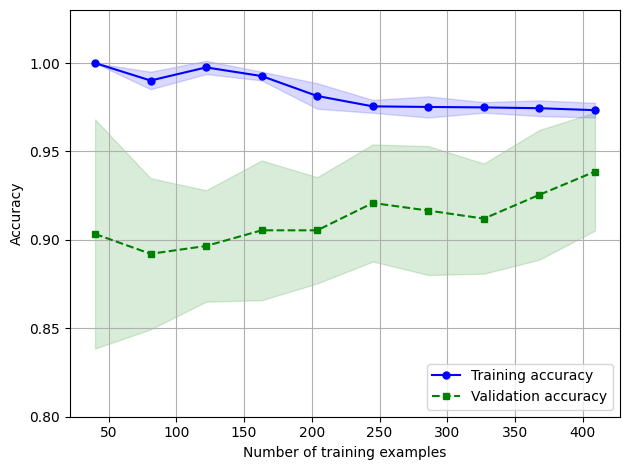

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

### Addressing over and under fitted with validation curves

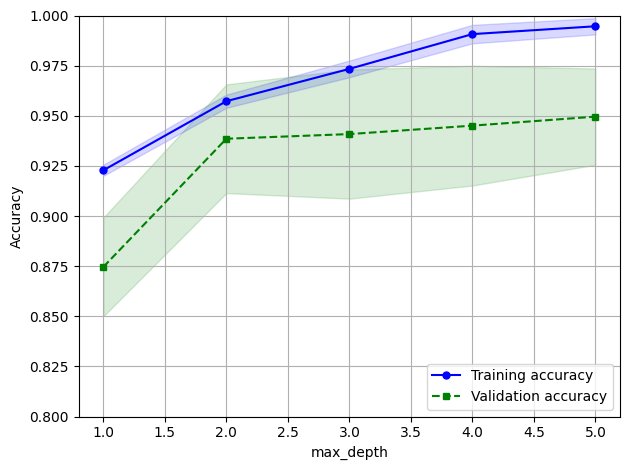

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [1,2,3,4,5]
train_scores, test_scores = validation_curve(
                estimator=tree,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

### Tuning hyper-parameters via grid search

*Better done in Lesson 9*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' :['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7]
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9605314009661836
{'criterion': 'gini', 'max_depth': 6}


In [ ]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train)
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.939


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'criterion' :['entropy','gini'],
    'max_depth': randint(1, 20)

}

rs = RandomizedSearchCV(estimator=tree,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=10,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [ ]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9583091787439614


In [ ]:
rs.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [ ]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

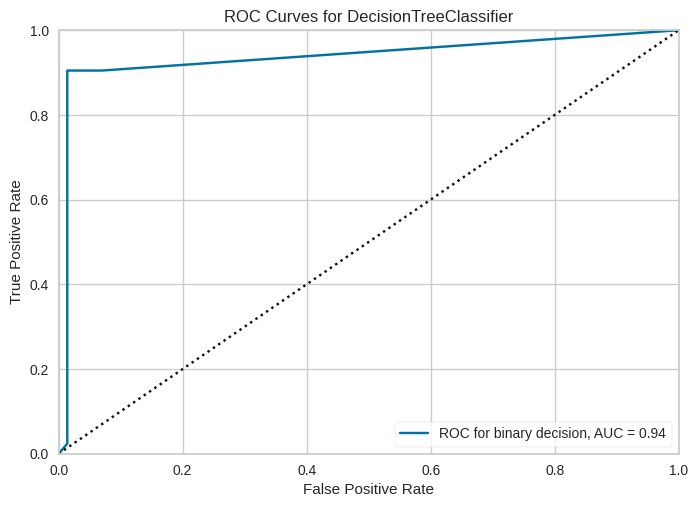

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(tree, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

## Laboratory Lecture

### Preparing the dataset

In [87]:
from google.colab import files
uploaded = files.upload()

Saving airline_passenger_satisfaction.csv to airline_passenger_satisfaction.csv


In [88]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')
df

Unnamed: 0  Gender      customer_type  age   type_of_travel  \
0                0    Male     Loyal Customer   13  Personal Travel   
1                1    Male  disloyal Customer   25  Business travel   
2                2  Female     Loyal Customer   26  Business travel   
3                3  Female     Loyal Customer   25  Business travel   
4                4    Male     Loyal Customer   61  Business travel   
...            ...     ...                ...  ...              ...   
129875      129875    Male  disloyal Customer   34  Business travel   
129876      129876    Male     Loyal Customer   23  Business travel   
129877      129877  Female     Loyal Customer   17  Personal Travel   
129878      129878    Male     Loyal Customer   14  Business travel   
129879      129879  Female     Loyal Customer   42  Personal Travel   

       customer_class  flight_distance  inflight_wifi_service  \
0            Eco Plus              460                      3   
1            Business              235                      3   
2            Business             1142                      2   
3            Business              562                      2   
4            Business              214                      3   
...               ...              ...                    ...   
129875       Business              526                      3   
129876       Business              646                      4   
129877            Eco              828                      2   
129878       Business             1127                      3   
129879            Eco              264                      2   

        departure_arrival_time_convenient  ease_of_online_booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        inflight_entertainment  onboard_service  leg_room_service  \
0                            5                4                 3   
1                            1                1                 5   
2                            5                4                 3   
3                            2                2                 5   
4                            3                3                 4   
...                        ...              ...               ...   
129875                       4                3                 2   
129876                       4                4                 5   
129877                       2                4                 3   
129878                       4                3                 2   
129879                       1                1                 2   

        baggage_handling  checkin_service  inflight_service  cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5       

In [89]:
df.shape

(129880, 24)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [91]:
df.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [92]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [93]:
# with this next command we remove all rows with missing values in the 'arrival_delay_in_minutes' column
df.dropna(subset=['arrival_delay_in_minutes'], inplace=True)
#df.dropna(inplace=True)

In [94]:
df.shape

(129487, 23)

The dataset is now correct. Let's examine the target variable `satisfaction`

In [95]:
df.satisfaction.value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565501
satisfied                  0.434499
Name: proportion, dtype: float64

<Axes: xlabel='satisfaction', ylabel='count'>

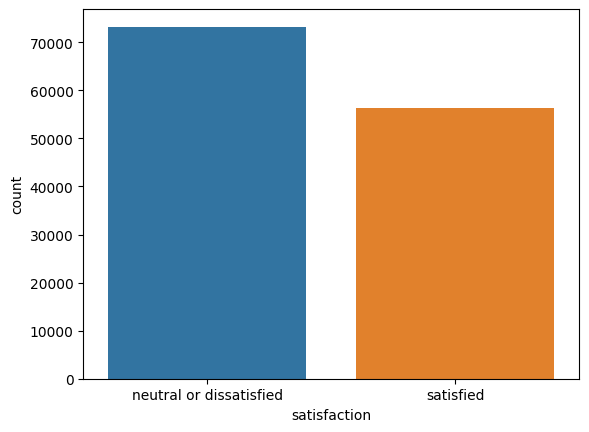

In [96]:
sns.countplot(x="satisfaction", data=df, hue="satisfaction")

#### Encoding

In [97]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

In [98]:
label_columns = df.select_dtypes(include=['object']).columns
label_columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')

In [99]:
df[label_columns].describe()

Gender   customer_type   type_of_travel customer_class  \
count   129487          129487           129487         129487   
unique       2               2                2              3   
top     Female  Loyal Customer  Business travel       Business   
freq     65703          105773            89445          61990   

                   satisfaction  
count                    129487  
unique                        2  
top     neutral or dissatisfied  
freq                      73225

In [100]:
len(numeric_columns)+len(label_columns) == df.shape[1]

True

We need to transform these "text" variables into a numerical form. For that, we use `LabelEncoder`

In [101]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for col in label_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    l = list(le.classes_)

df.head()

Gender  customer_type  age  type_of_travel  customer_class  \
0       1              0   13               1               2   
1       1              1   25               0               0   
2       0              0   26               0               0   
3       0              0   25               0               0   
4       1              0   61               0               0   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ease_of_online_booking  gate_location  ...  inflight_entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   onboard_service  leg_room_service  baggage_handling  checkin_service  \
0                4                 3                 4                4   
1                1                 5                 3                1   
2                4                 3                 4                4   
3                2                 5                 3                1   
4                3                 4                 4                3   

   inflight_service  cleanliness  departure_delay_in_minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   arrival_delay_in_minutes  satisfaction  
0                      18.0             0  
1                       6.0             0  
2                       0.0             1  
3                       9.0             0  
4                       0.0             1  

[5 rows x 23 columns]

In [102]:
df.satisfaction.value_counts(normalize=True)

satisfaction
0    0.565501
1    0.434499
Name: proportion, dtype: float64

The positive class in `scikit-learn` is the class that is labeled as class 1. This is important. **The positive class is always 1**

### Train/Test

In [103]:
X = df.drop('satisfaction', axis=1) # features (independent variables)
y = df['satisfaction'] # target (dependent variable)

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [105]:
y_train.value_counts(normalize=True)

satisfaction
0    0.565501
1    0.434499
Name: proportion, dtype: float64

### Over-fitted model

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
m_01 = DecisionTreeClassifier(random_state=1)
m_01.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

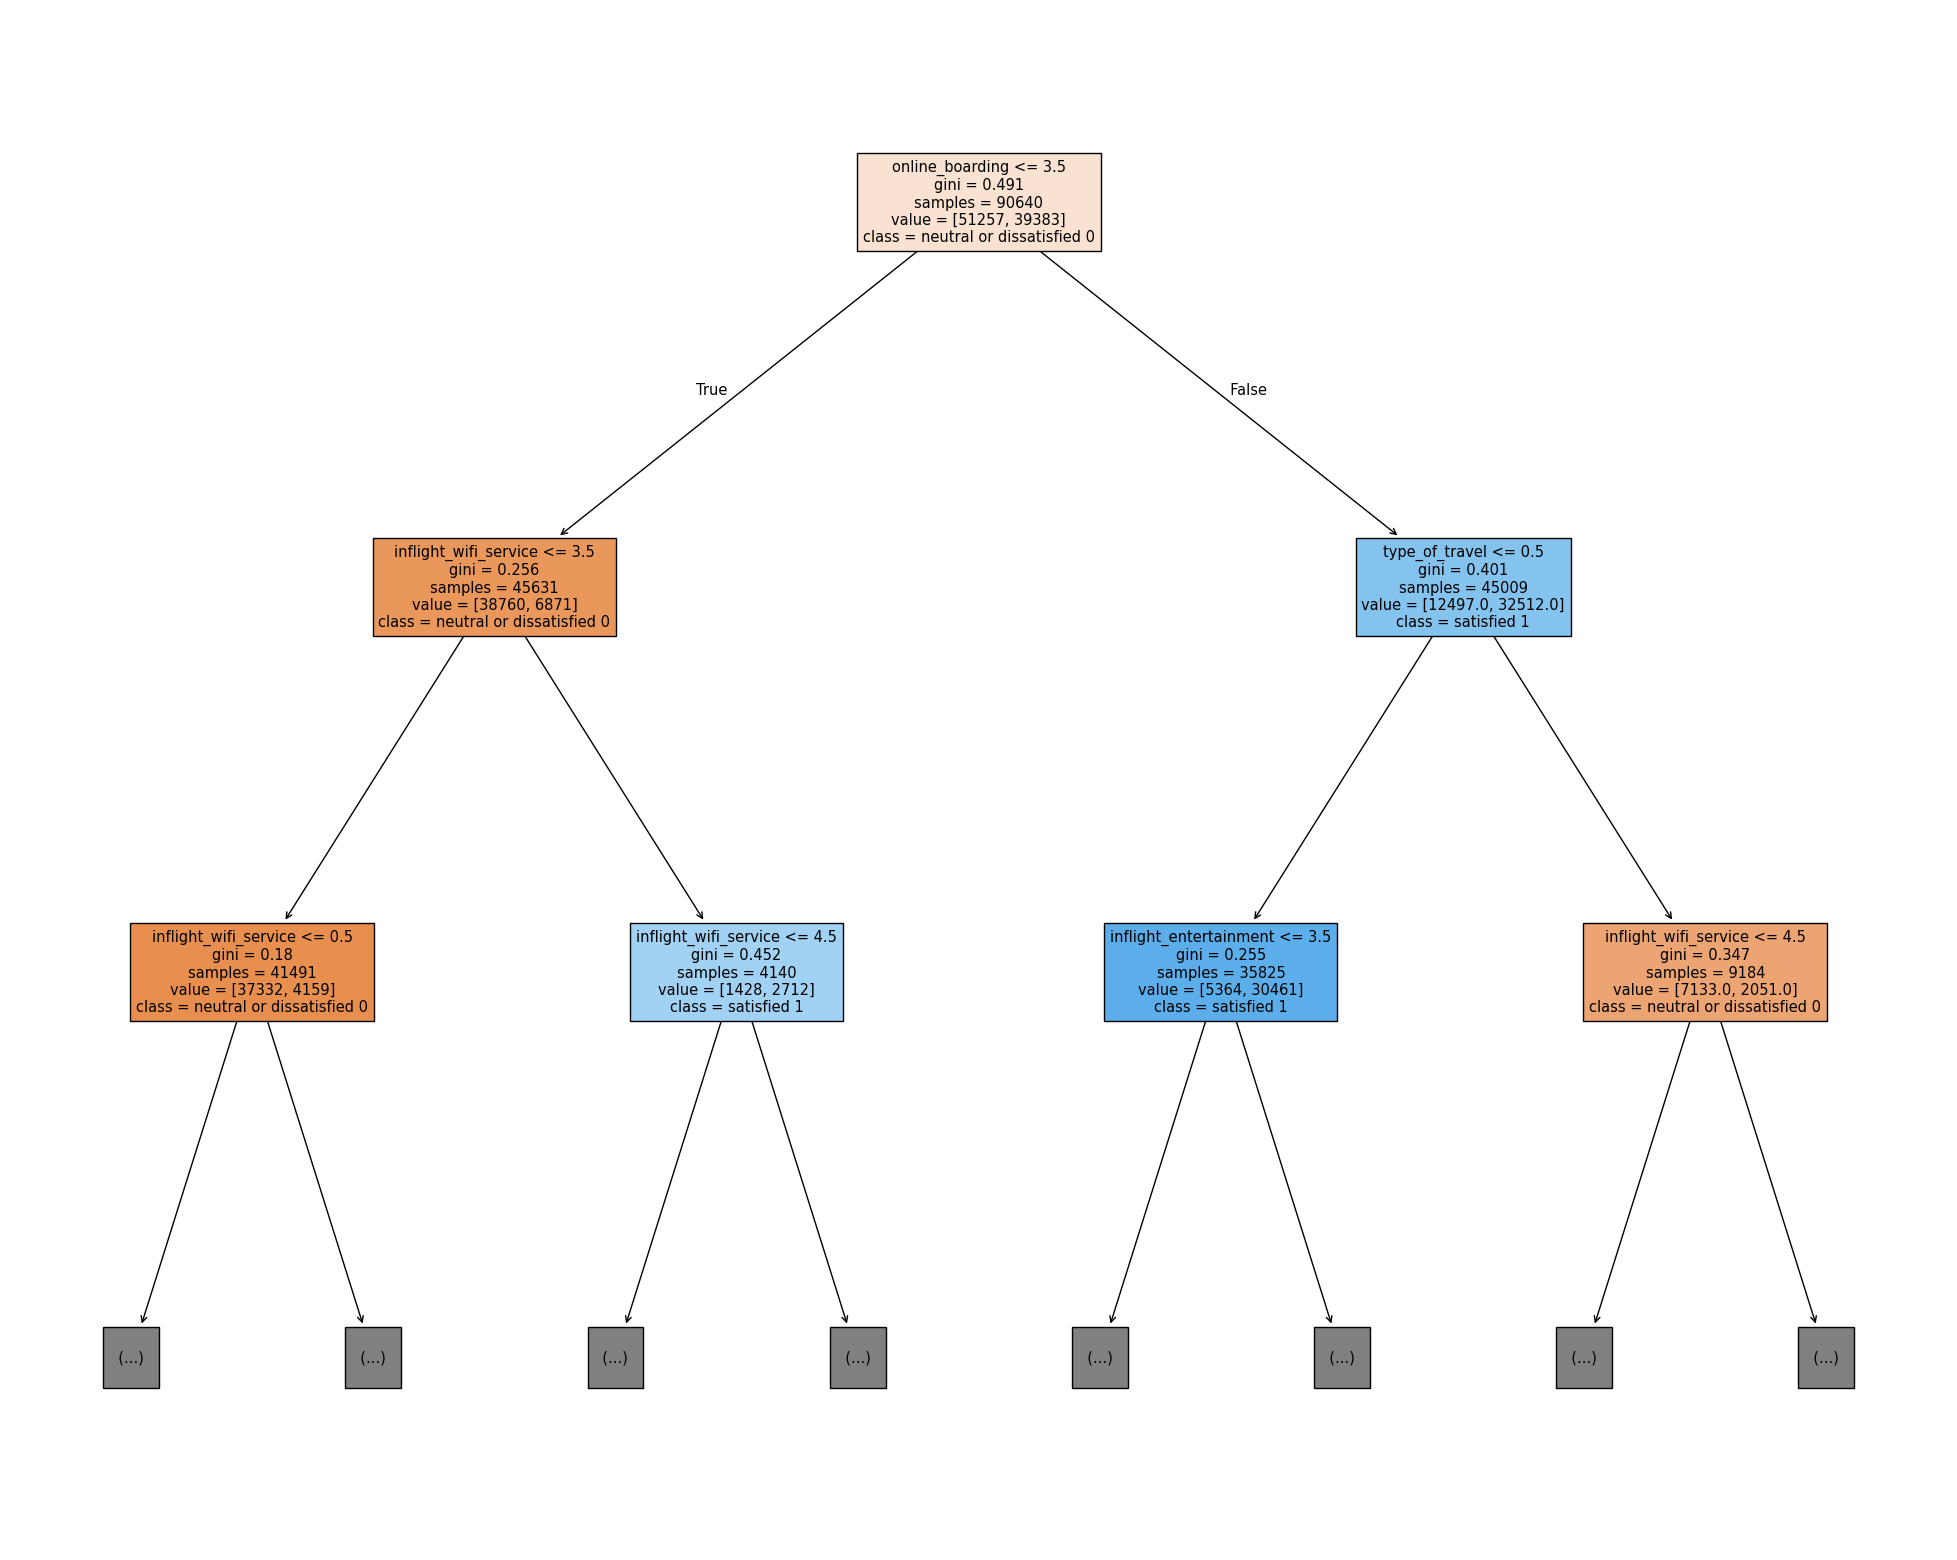

In [108]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m_01,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   max_depth=2,
                   filled=True)

#### Prediction

In [109]:
m_01Pred = m_01.predict(X_test)
m_01Pred

array([0, 0, 0, ..., 0, 1, 0])

#### Evaluation

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, m_01Pred)

array([[20887,  1081],
       [  952, 15927]])

In [111]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, m_01Pred))

Accuracy Score:  0.9476664864725719


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, m_01Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.96      0.95      0.95     21968
      Yes(1)       0.94      0.94      0.94     16879

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



The precision of the class 0 means that our classifier, in 96%, always recognises the negative class, and in 94% recognises the positive class.

In the recall column: in this test set we have 95% of the negative class and 94% of the possitive class

For the **kappa** score, the closer to 1, the better the model is

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, m_01Pred)

0.8935995766129229

ROC and **AUC**

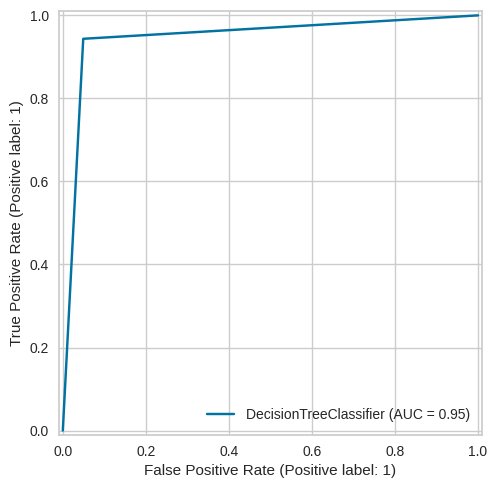

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(m_01, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


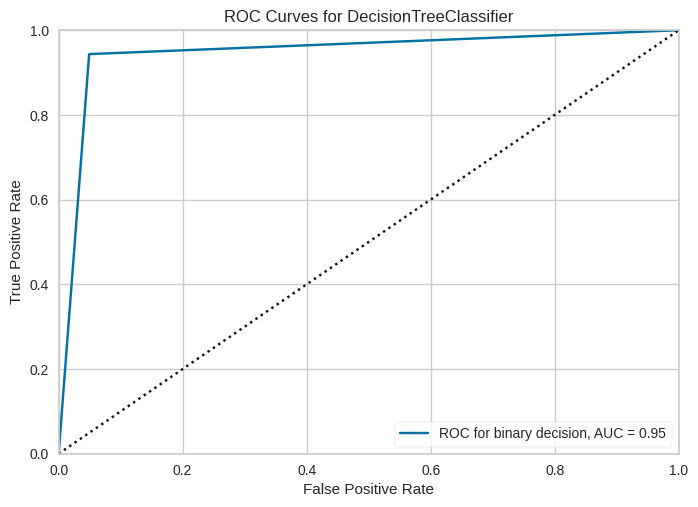

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(m_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

From all these tests we are carrying out we can think that this is a very good model. However, we have to remember this is an over-fitted model. Let's break down how to check this.

#### Diagnosis bias and variance problems with learning curves

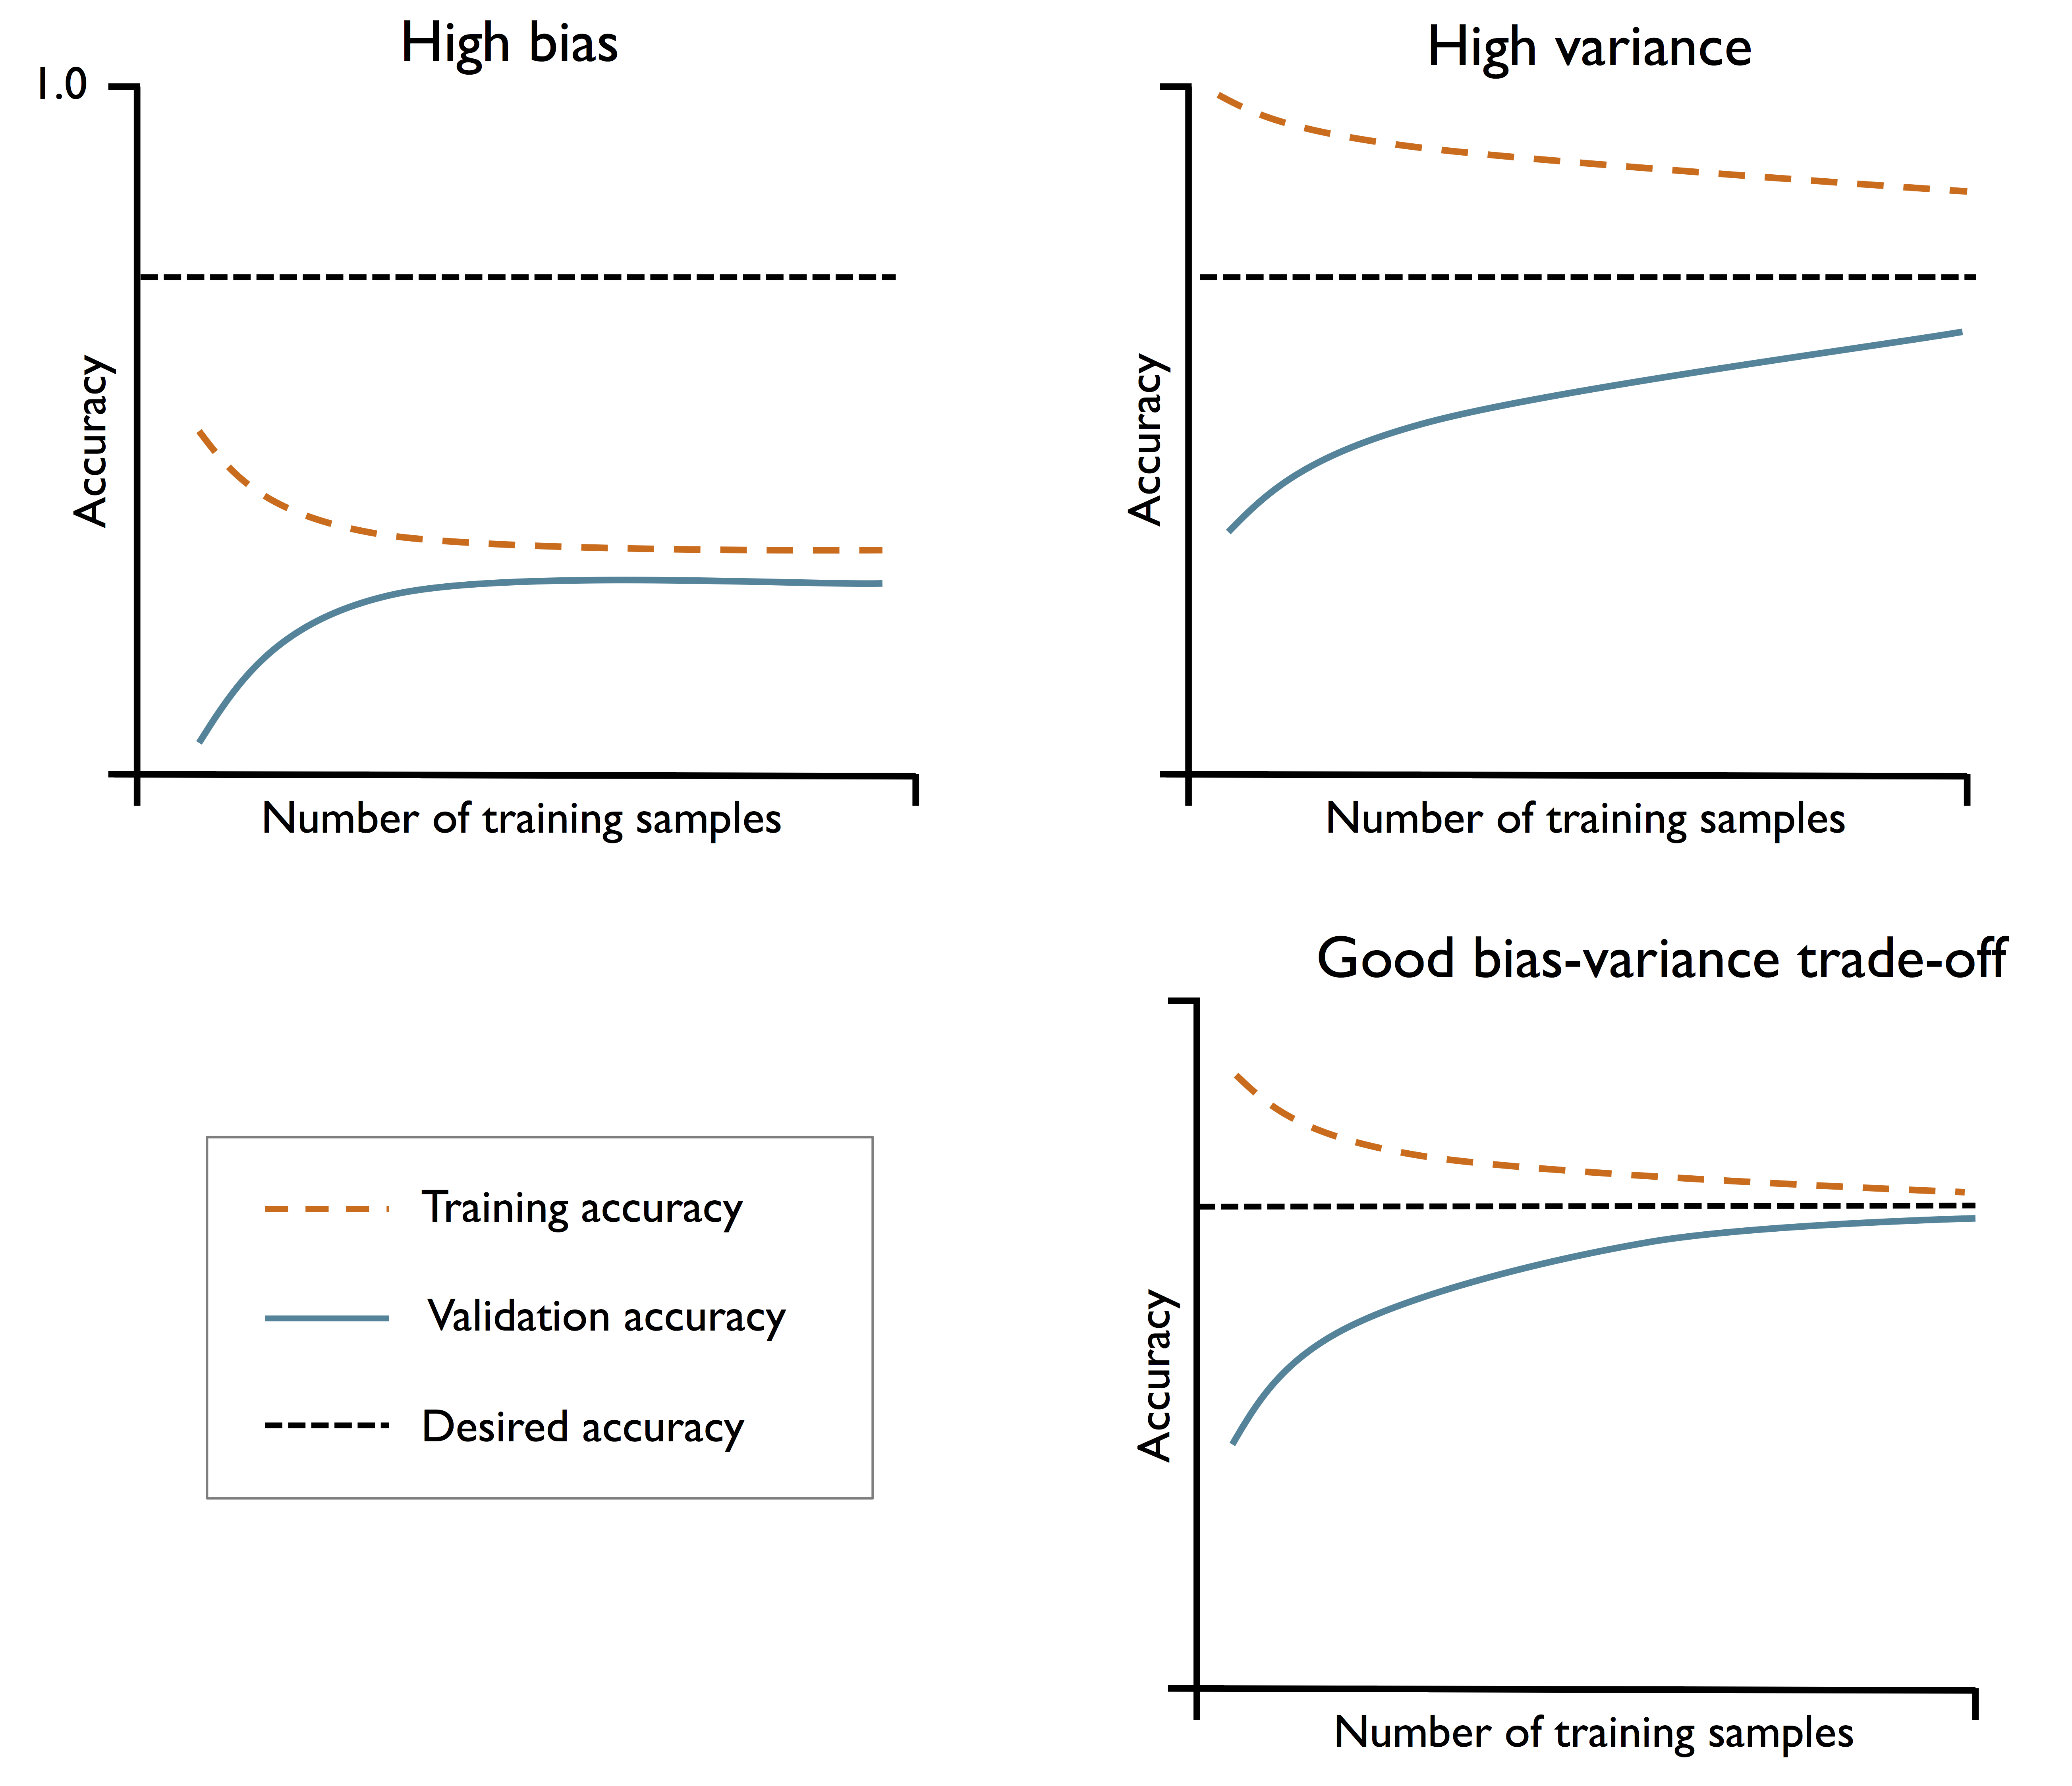

Let's talk about the pictures.
1. The first one represents an **under-fitted model**. Even if training and validation accuracy are quite similar, they are different from the desired accuracy we would like to obtain. An underfitted model performs poorly on both the training data and test data. It fails to capture the underlying patterns in the data, typically due to being overly simplistic. One of the main causes are shallow trees: a decision tree with very few splits (low depth) cannot capture the complexity of the data.

2. The second one is an **over-fitted model**, where there's a big gap between the training and validation accuracies. An overfitted model performs very well on the training data but poorly on the test data. It captures noise and small details that don't generalize well to new data.
One main cause of an over-fitted model are deep trees: decision tree that is too deep (many splits) memorizes the training data, including noise.

3. The third one, on the other hand, would be the ideal model, where everything's balanced

In order to study this, we will use the `learning_curve` function from `scikit-learn` to evaluate how the performance of a machine learning model (here, `m_01`) changes as the size of the training dataset increases.

The `learning_curve` function generates scores for training and validation sets at different training set sizes, allowing us to analyze how the model's performance evolves.

In [113]:
from sklearn.model_selection import learning_curve

If we set the `n_jobs` parameter to 1, only one CPU will be used to evaluate the performances. However, by setting `n_jobs=2`, we could distribute the 10 rounds of cross-validation to two CPUs (if available on our machine), and by setting `n_jobs=-1`, we can use all available CPUs on our machine to do the computation in parallel.

In [114]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=m_01,  # the estimator is our model (m_01)
                               X=X_train,       # the feature matrix for training
                               y=y_train,       # the target vector for training
                               train_sizes=np.linspace(0.1, 1.0, 10), # varying training sizes
                               cv=10,           # cross validation
                               n_jobs=-1)       # use all CPU cores for parallel computation

 * `estimator=m_01`: The machine learning model (or estimator) being evaluated.
 * `X=X_train`, `y=y_train`: The feature matrix (`X_train`) and the target values (`y_train`) of the training data.
 * `train_sizes=np.linspace(0.1, 1.0, 10)`: This generates 10 evenly spaced values between 10% and 100% of the training data size, specifying the fractions of data used for training in each step.
 * `cv=10`: Cross-validation is performed with 10 folds to reduce variance in the results.
 * `n_jobs=-1`: All available CPU cores are used to speed up computation.

The function outputs:

 * `train_sizes`: The absolute number of training samples used in each training iteration.
 * `train_scores`: The accuracy scores on the training sets for each cross-validation fold.
 * `test_scores`: The accuracy scores on the validation (test) sets for each cross-validation fold.


In [115]:
train_mean = np.mean(train_scores, axis=1)  # Mean training accuracy for each training size
train_std = np.std(train_scores, axis=1)    # Standard deviation of training accuracy
test_mean = np.mean(test_scores, axis=1)    # Mean validation accuracy for each training size
test_std = np.std(test_scores, axis=1)      # Standard deviation of validation accuracy

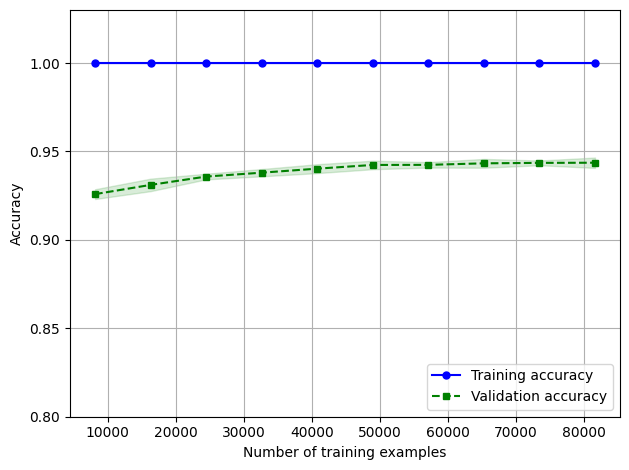

In [116]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

When we see this plot, we can say that this is an over-fitted model because we can see that the accuracy is 1 (thus error is 0) in the training set (blue line). However, in the test set there is some error. And there is a big gap between those two lines, which means this is indeed an over-fitted model.

### Under-fitted model

In [117]:
m_02 = DecisionTreeClassifier(max_depth=1, random_state=1)
m_02.fit(X_train,y_train)
m_02Pred = m_02.predict(X_test)

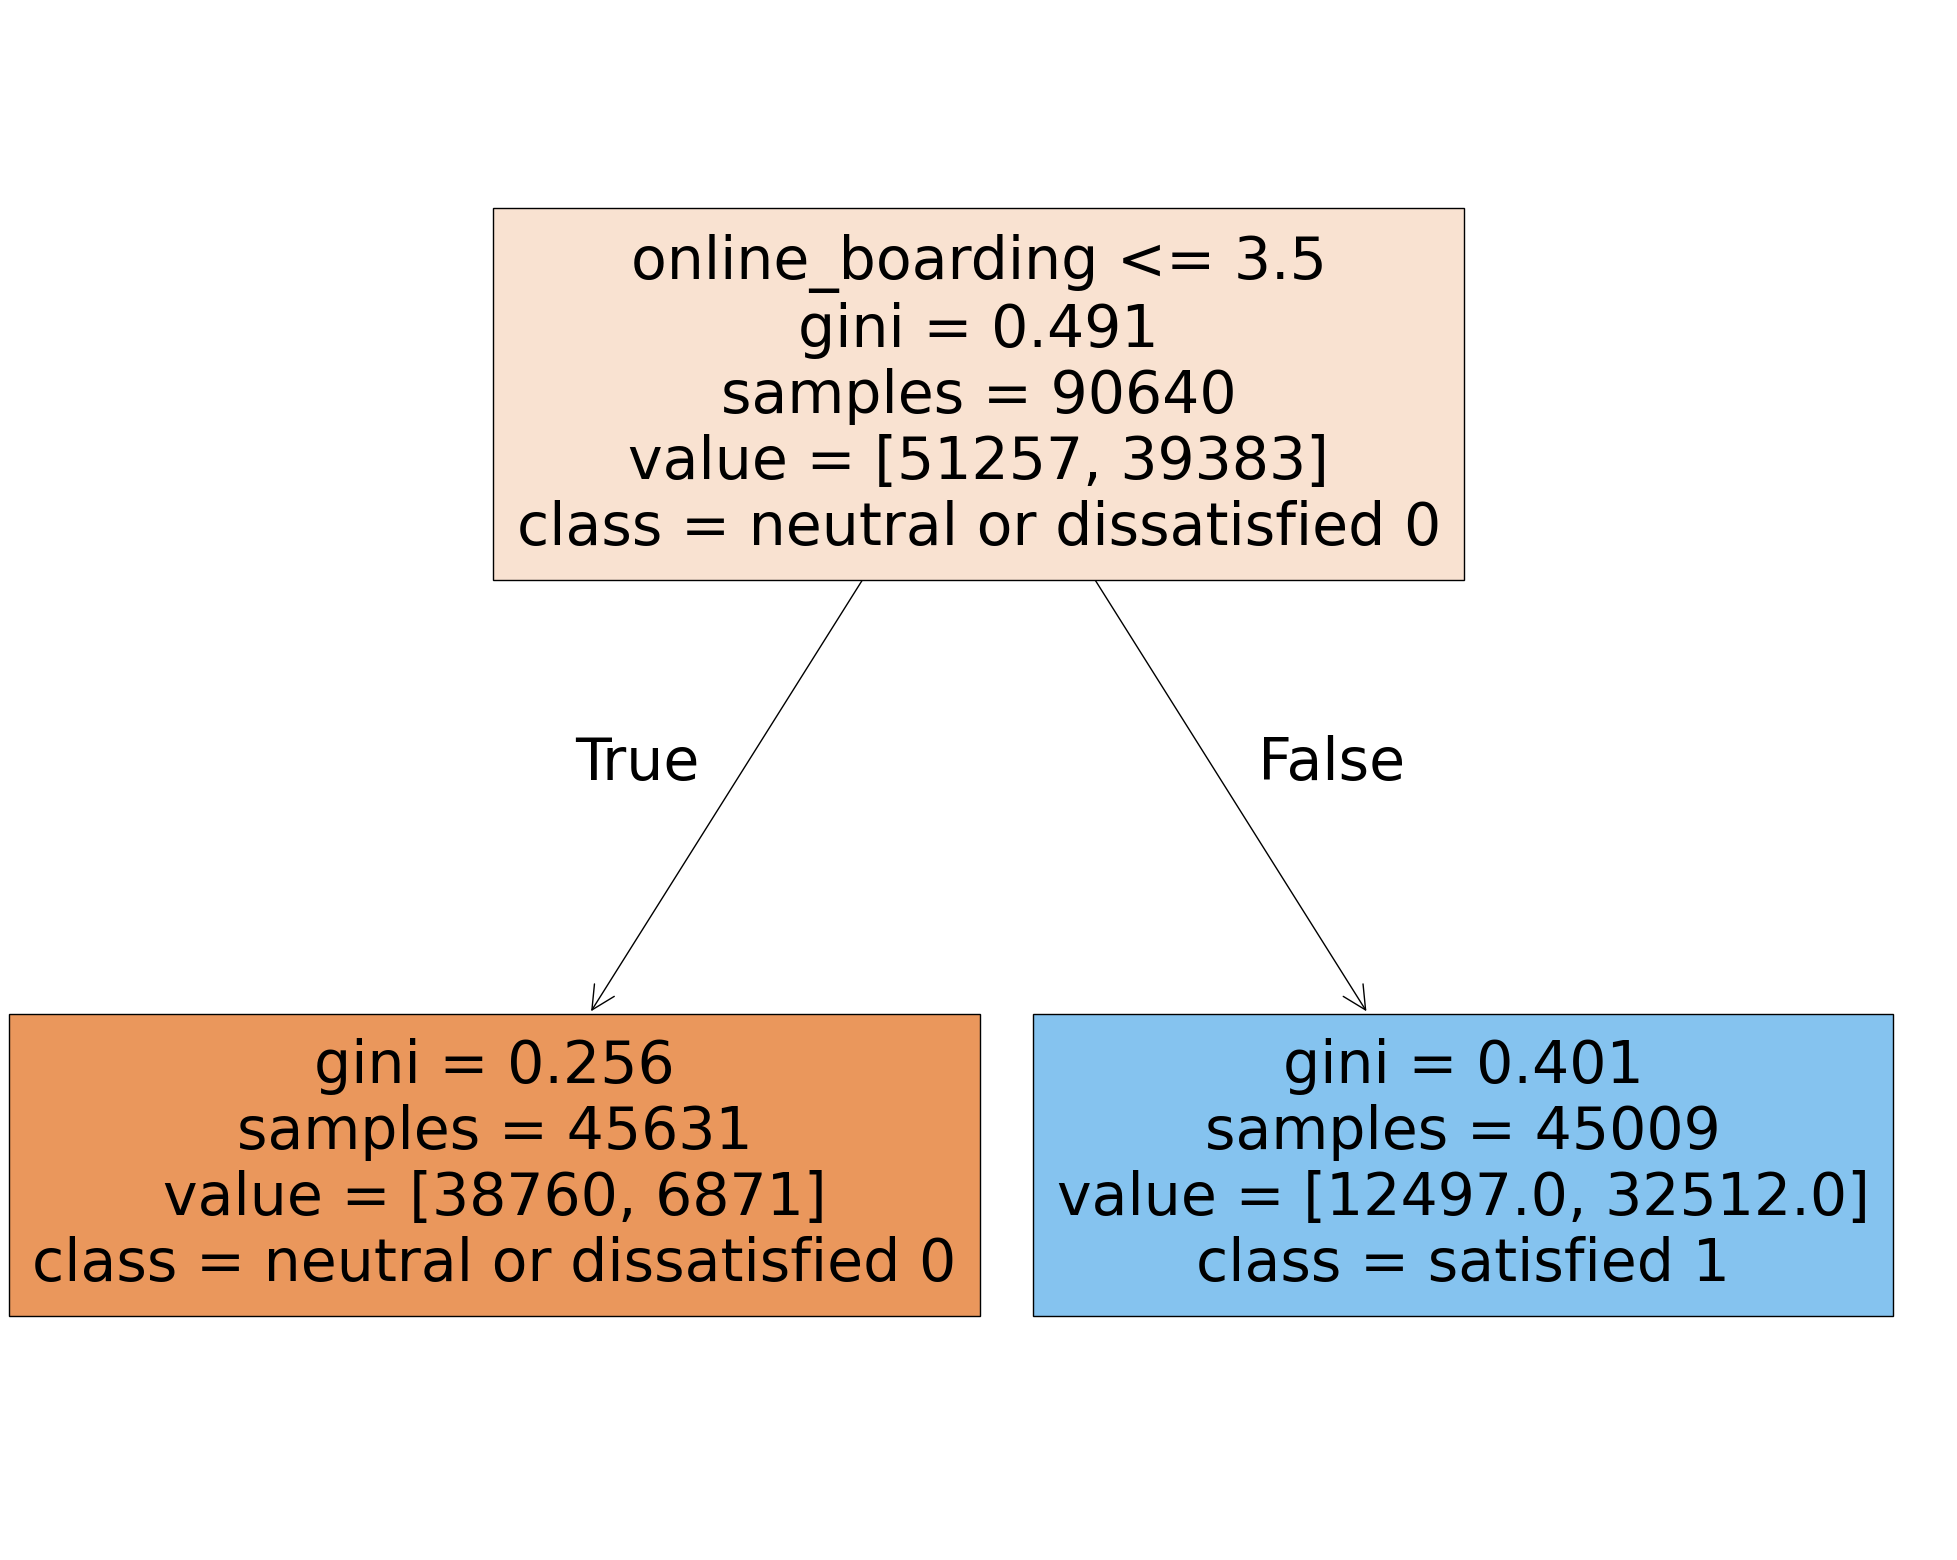

In [118]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m_02,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   filled=True)

In [119]:
confusion_matrix(y_test, m_02Pred)

array([[16648,  5320],
       [ 2914, 13965]])

In [120]:
print('Accuracy Score: ', accuracy_score(y_test, m_02Pred)) # accuracy of course is lower

Accuracy Score:  0.7880402605091771


In [121]:
# Here, comparing with the previous over-fitted model, we clearly have lower values for this parameters
print(classification_report(y_test, m_02Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.85      0.76      0.80     21968
      Yes(1)       0.72      0.83      0.77     16879

    accuracy                           0.79     38847
   macro avg       0.79      0.79      0.79     38847
weighted avg       0.80      0.79      0.79     38847



In [125]:
cohen_kappa_score(y_test, m_02Pred) # also lower

0.5756841640579805

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


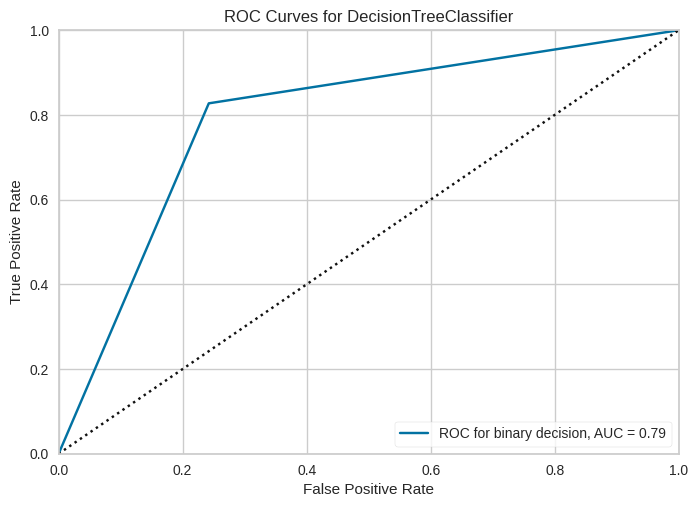

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [141]:
# the ROC curve is closer to the diagonal and the AUC value is lower
vis = ROCAUC(m_02, binary=True)
vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [142]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=m_02,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

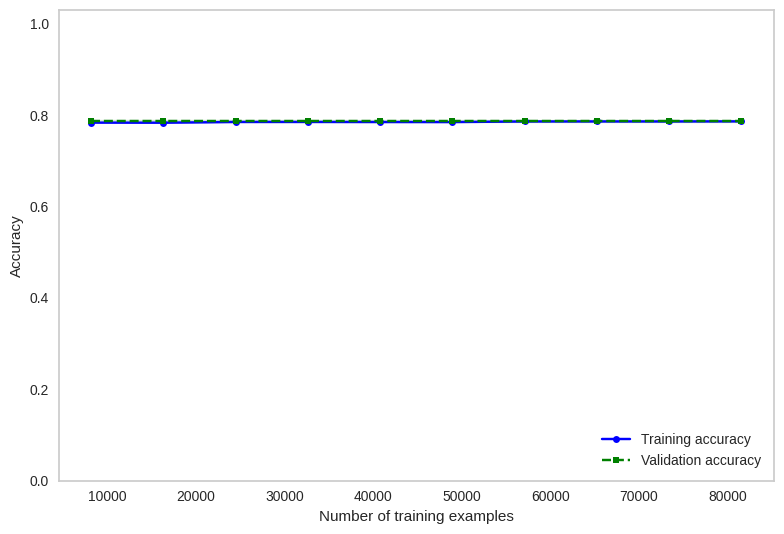

In [143]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
plt.show()

We observe this  is an under-fitted model, because even if both accuracies are very similar, they're probably not like the desired one (which would be closer to 1)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(m_02, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:', score)
print('Average score:',score.mean())

Scores for each fold are: [0.78375993 0.78177405 0.78894528 0.78453222 0.78442189 0.7869594
 0.79181377 0.78795234 0.78574581 0.78729038]
Average score: 0.7863195057369815


### Optimal model

In [144]:
path=m_01.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.00000000e+00, 4.40171803e-06, 5.48480646e-06, ...,
       2.69947495e-02, 6.34005780e-02, 1.63451032e-01])

In [148]:
len(alphas)

1589

In [149]:
range(0, len(alphas), 100)

range(0, 1589, 100)

In [150]:
new_alphas=alphas[0:1589:100]

In [151]:
len(new_alphas)

16

In [152]:
acc_train, acc_test = [], []

for i in new_alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy_score(y_test,y_test_pred_t))

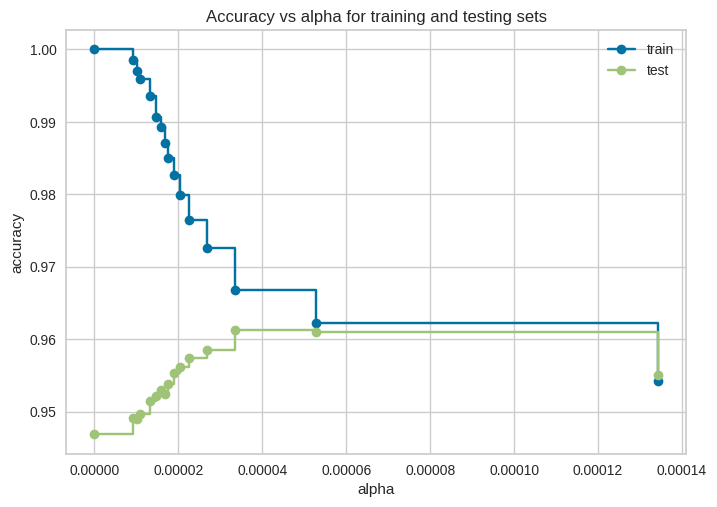

In [153]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(new_alphas, acc_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(new_alphas, acc_test, marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

The optimal value is when the two lines are closer. In this example, any value between $[0.00006,0.00012]$ would be appropiate

In [ ]:
best_alpha=0.00006 # for example

In [ ]:
best=DecisionTreeClassifier(ccp_alpha=best_alpha)
best.fit(X_train,y_train)
y_test_pred_best=best.predict(X_test)

In [ ]:
best.get_params()

{'ccp_alpha': 6e-05,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

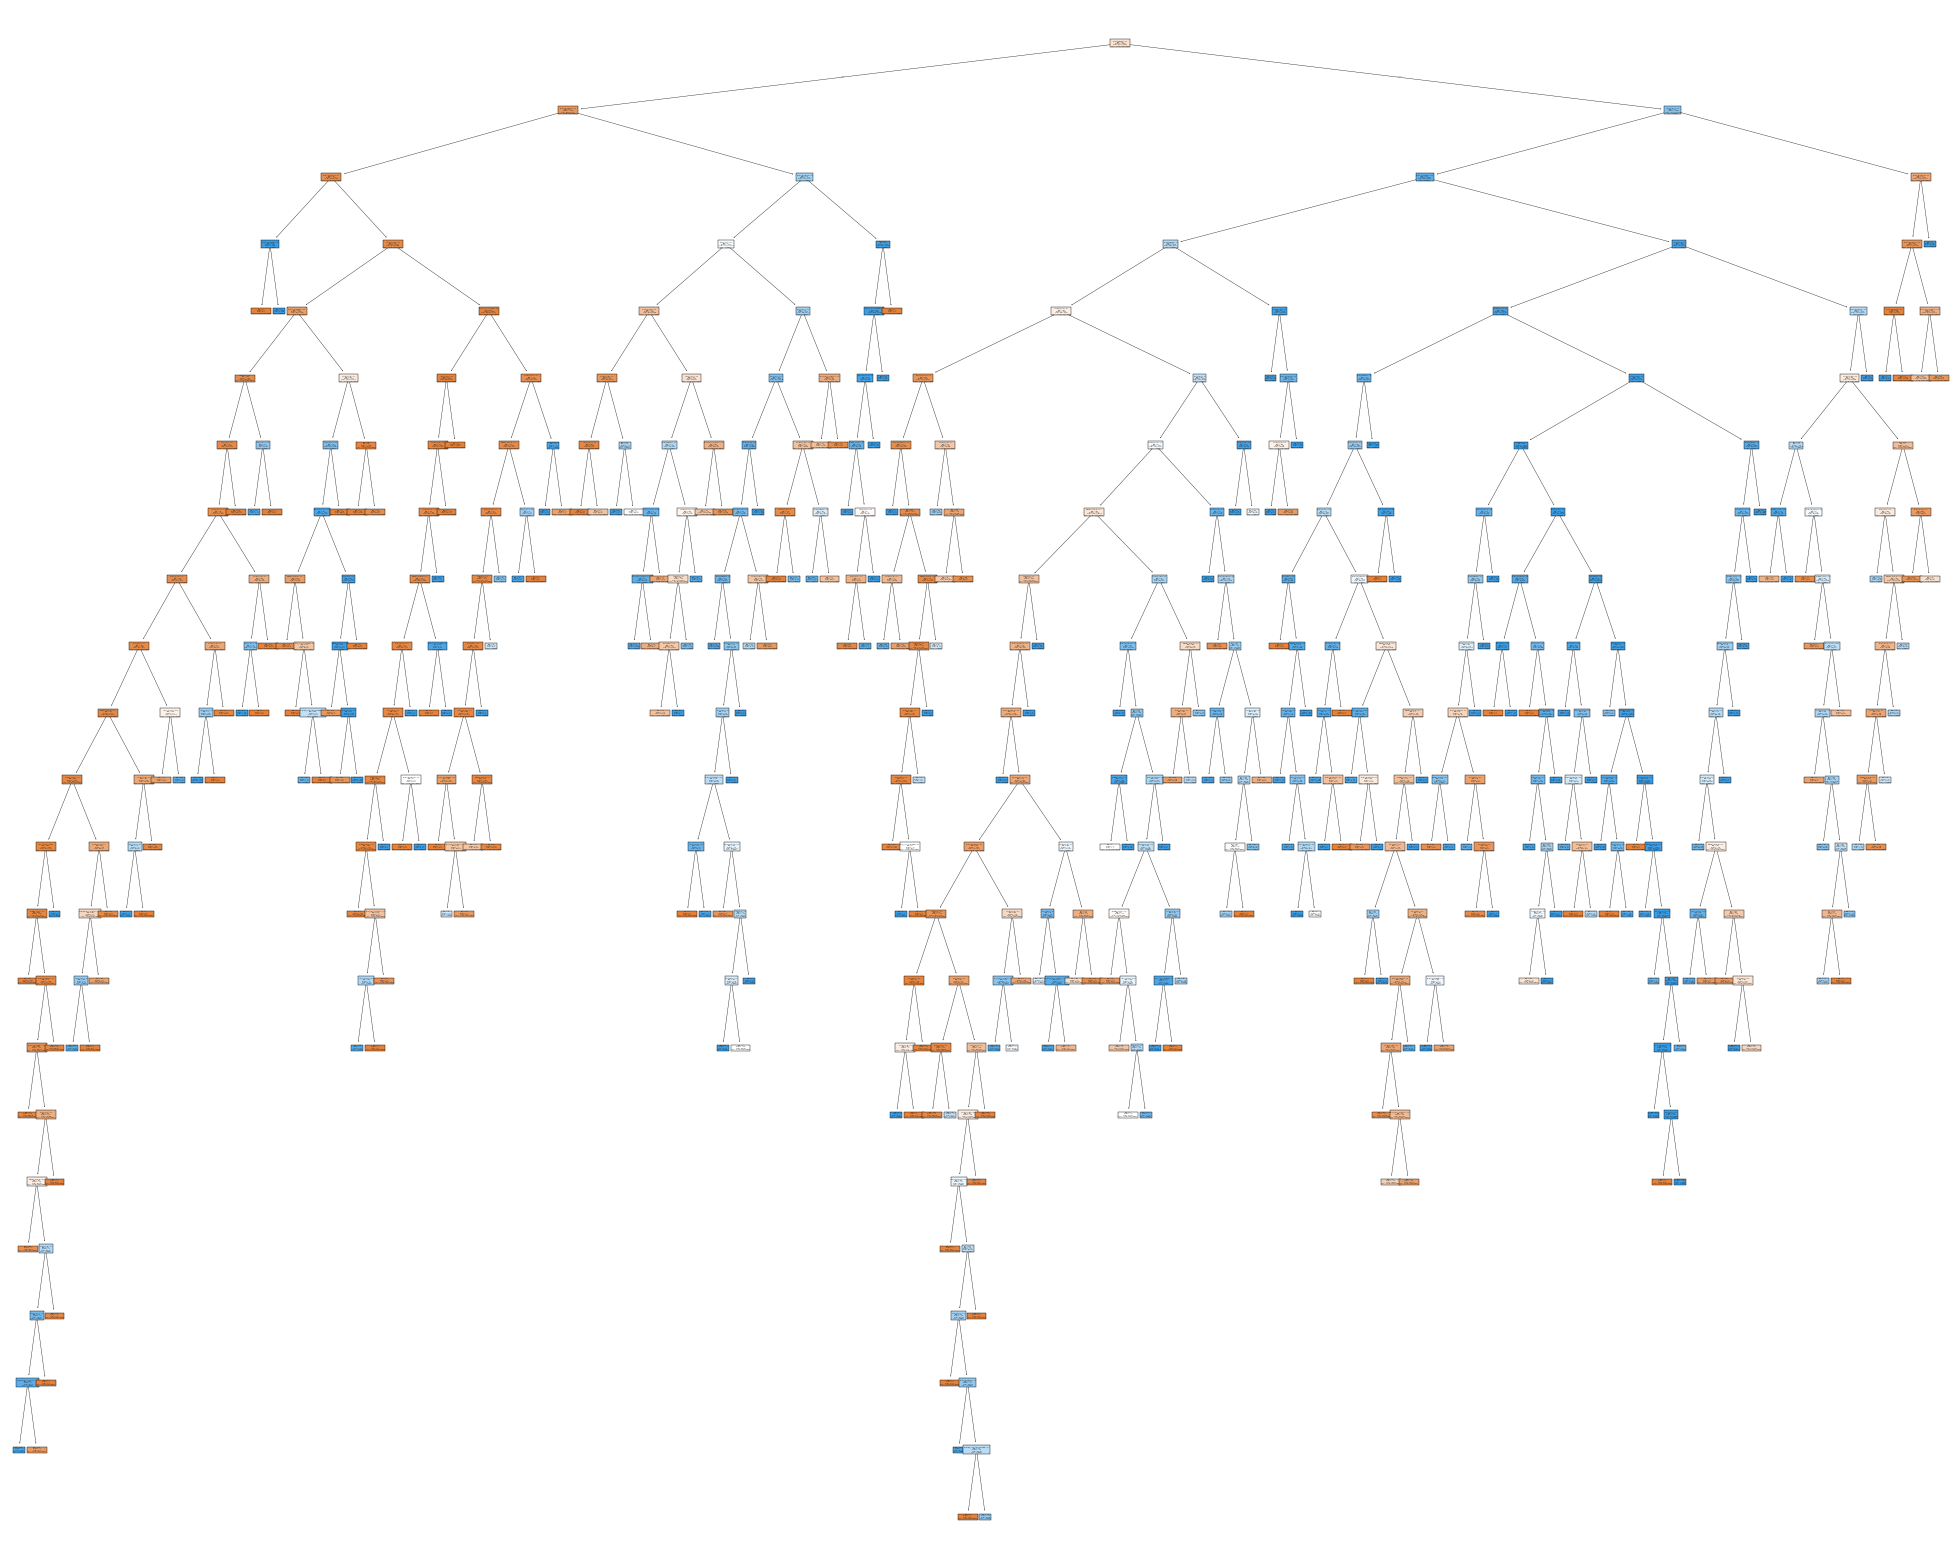

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   filled=True)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_best)) # higher than the over-fitted model
confusion_matrix(y_test, y_test_pred_best)

Accuracy Score:  0.9600483949854558


array([[21480,   488],
       [ 1064, 15815]])

In [ ]:
print(classification_report(y_test, y_test_pred_best, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.95      0.98      0.97     21968
      Yes(1)       0.97      0.94      0.95     16879

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [ ]:
cohen_kappa_score(y_test, y_test_pred_best) # also better than the over-fitted model

0.9183789858150483

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


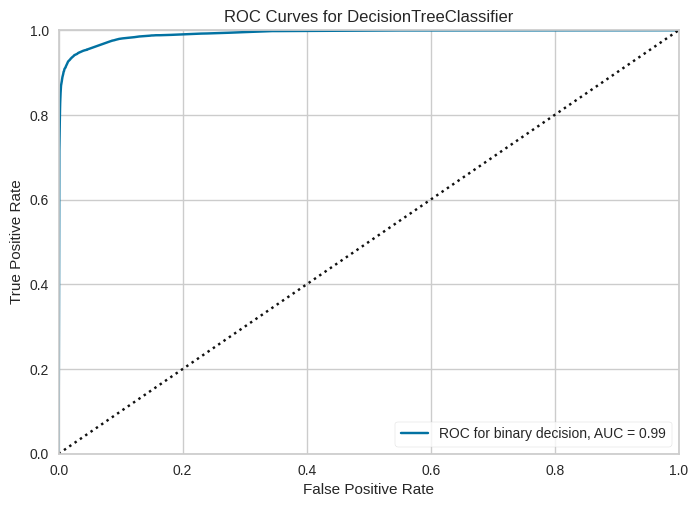

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
vis = ROCAUC(best, binary=True) # the AUC is also better
vis.fit(X_train, y_train)
vis.score(X_test, y_test)
vis.show()

The parameters tell us this is the best model. Let's see if it's really optimal

In [ ]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

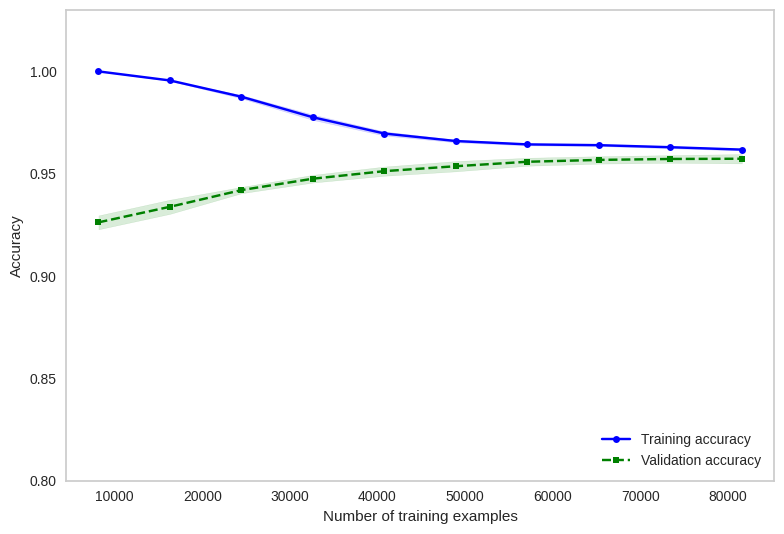

In [ ]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

This is an optimal model. Both sets are around the perfect accuracy (96%), tending to this desired accuracy. With this analysis we can say that for this data this is the best model

### Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters.

In our case, we are going to use the `validation_curve` function from `scikit-learn` to analyze how the performance of a model (`best`) changes as a specific hyperparameter (`max_depth`) varies over a defined range (`param_range`).

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [10,15,20,21,22,23,25,30] # Range of 'max_depth' values to test
train_scores, test_scores = validation_curve(
                estimator=best,           # The model being evaluated
                X=X_train,                # Feature matrix for training
                y=y_train,                # Target values for training
                param_name='max_depth',   # The hyperparameter being analyzed
                param_range=param_range,  # Values of the hyperparameter to test
                cv=10                     # Number of cross-validation folds
)

**Explanation of Parameters:**
 * `param_name='max_depth'`:
  - This specifies the hyperparameter of the model being varied.
  - `max_depth` is commonly used in tree-based models (e.g., Decision Trees, Random Forests) to set the maximum depth of the tree, controlling its complexity.
 * `param_range=param_range`: This defines the specific values of the hyperparameter (`max_depth`) to evaluate.
 * `cv=10`:
10-fold cross-validation is used to ensure reliable performance estimates.
 * `estimator=best`:
The model being evaluated. It is assumed to be pre-initialized or pre-trained.

**Outputs:**
 * `train_scores`: An array of shape (`len(param_range)`, `cv`). It contains the accuracy scores for each value of the hyperparameter (`param_range`) across the cross-validation folds on the training set.
 * `test_scores`: Similar to `train_scores`, but for the validation (test) set.


In [ ]:
train_mean = np.mean(train_scores, axis=1)  # Average training accuracy for each max_depth
train_std = np.std(train_scores, axis=1)    # Standard deviation for training accuracy
test_mean = np.mean(test_scores, axis=1)    # Average validation accuracy for each max_depth
test_std = np.std(test_scores, axis=1)      # Standard deviation for validation accuracy

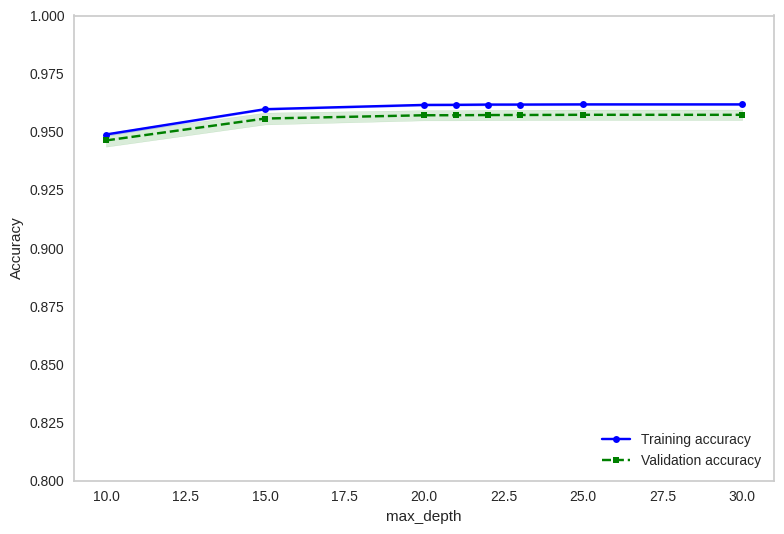

In [ ]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
m_03=DecisionTreeClassifier(max_depth=15)
m_03.fit(X_train,y_train)
m_03Pred=m_03.predict(X_test)

In [ ]:
confusion_matrix(y_test, m_03Pred)

array([[21209,   759],
       [ 1081, 15798]])

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, m_03Pred))

Accuracy Score:  0.9526346950858496
